In [ ]:
!pip install vnstock

In [ ]:
from vnstock import *
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

**Vui lòng chuyển đổi sang Vnstock3** thế hệ mới (3.1.0) với câu lệnh: `pip install vnstock3 --upgrade`.
**Từ 1/1/2025, vnstock3 sẽ được cài đặt khi sử dụng cú pháp** `pip install vnstock` **thay cho Vnstock Legacy** hiện tại.
Xem chi tiết [chuyển đổi sang vnstock3](https://vnstocks.com/docs/tai-lieu/migration-chuyen-doi-sang-vnstock3).
Phiên bản **Vnstock Legacy (0.2.9.2.3)** bạn đang sử dụng **sẽ không được nâng cấp thêm.**
Từ 7/10/2024 Vnstock giới thiệu nhóm Facebook Cộng đồng Vnstock, tham gia thảo luận tại đây: https://www.facebook.com/groups/vnstock.official

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Phân tích cơ bản (Fundamental analysis):
- Chỉ số tài chính: P/E, P/B, RoE, RoA.
- Báo cáo tài chính: Income Statement, Balance Sheet, Cashflow.

### Chỉ số tài chính:

In [ ]:
financial_mbb = financial_ratio("MBB", 'quarterly', False)
financial_mbb_df = pd.DataFrame(financial_mbb)
financial_mbb_df.head()

range          Q3-2024 Q2-2024 Q1-2024 Q4-2023 Q3-2023 Q2-2023 Q1-2023  \
ticker             MBB     MBB     MBB     MBB     MBB     MBB     MBB   
quarter             Q3      Q2      Q1      Q4      Q3      Q2      Q1   
year              2024    2024    2024    2023    2023    2023    2023   
priceToEarning     6.0     5.5     6.5     4.7     5.0     5.0     4.5   
priceToBook        1.2     1.1     1.3     1.0     1.0     1.1     0.9   

range          Q4-2022 Q3-2022 Q2-2022  
ticker             MBB     MBB     MBB  
quarter             Q4      Q3      Q2  
year              2022    2022    2022  
priceToEarning     4.3     5.0     5.6  
priceToBook        0.9     1.2     1.3

In [ ]:
# Chuyển đổi toàn bộ DataFrame
financial_mbb_df = financial_mbb_df.T

financial_mbb_df.head()

ticker quarter  year priceToEarning priceToBook    roe    roa  \
range                                                                   
Q3-2024    MBB      Q3  2024            6.0         1.2   0.22  0.023   
Q2-2024    MBB      Q2  2024            5.5         1.1  0.234  0.024   
Q1-2024    MBB      Q1  2024            6.5         1.3  0.227  0.024   
Q4-2023    MBB      Q4  2023            4.7         1.0  0.245  0.025   
Q3-2023    MBB      Q3  2023            5.0         1.0  0.239  0.026   

        earningPerShare bookValuePerShare interestMargin  ... loanOnEarnAsset  \
range                                                     ...                   
Q3-2024            4020             20734          0.044  ...           0.708   
Q2-2024            4017             19639          0.044  ...           0.709   
Q1-2024            3804             19098          0.047  ...           0.713   
Q4-2023            3896             18225          0.048  ...           0.675   
Q3-2023            3604             17293          0.055  ...           0.693   

        loanOnAsset loanOnDeposit depositOnEarnAsset badDebtOnAsset  \
range                                                                 
Q3-2024       0.682         1.119              0.633          0.015   
Q2-2024       0.682         1.089              0.651          0.011   
Q1-2024       0.683         1.101              0.647          0.017   
Q4-2023       0.647         1.077              0.627           0.01   
Q3-2023       0.657         1.118               0.62          0.012   

        liquidityOnLiability payableOnEquity cancelDebt  \
range                                                     
Q3-2024                0.331             8.4      0.015   
Q2-2024                0.331             8.5      0.014   
Q1-2024                 0.33             7.9      0.012   
Q4-2023                0.364             8.8      0.012   
Q3-2023                 0.35             7.9       0.01   

        bookValuePerShareChange creditGrowth  
range                                         
Q3-2024                   0.056        0.309  
Q2-2024                   0.028        0.301  
Q1-2024                   0.048        0.278  
Q4-2023                   0.054        0.327  
Q3-2023                   0.066        0.258  

[5 rows x 32 columns]

In [ ]:
print(financial_mbb_df.index)

Index(['Q3-2024', 'Q2-2024', 'Q1-2024', 'Q4-2023', 'Q3-2023', 'Q2-2023',
       'Q1-2023', 'Q4-2022', 'Q3-2022', 'Q2-2022'],
      dtype='object', name='range')


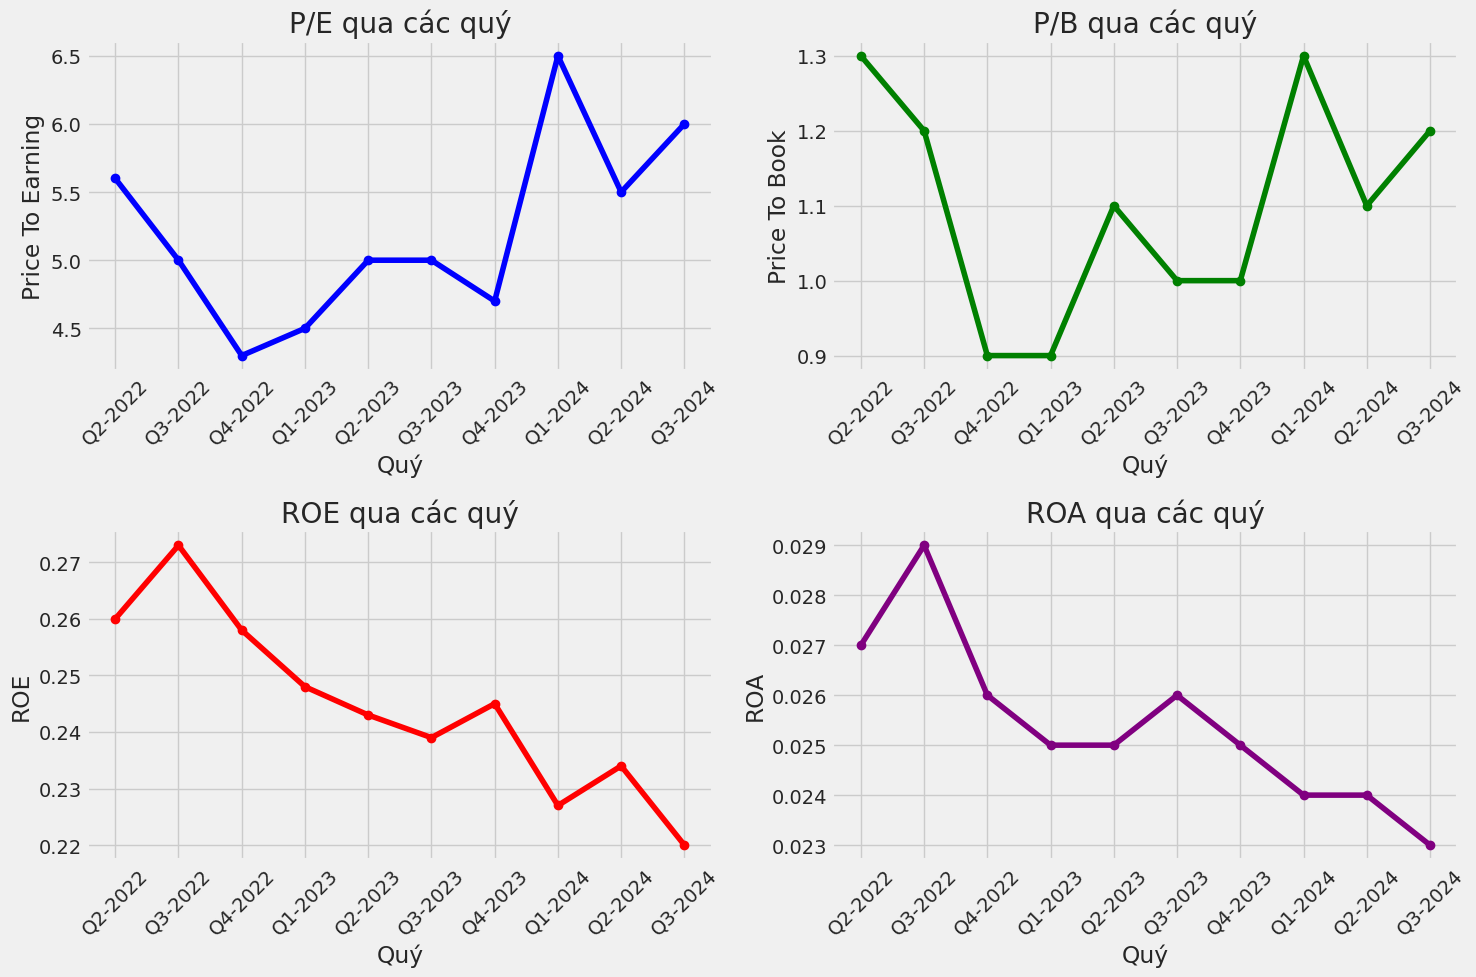

In [ ]:
# Thiết lập kích thước và số lượng biểu đồ
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # 2 hàng, 2 cột

# Vẽ biểu đồ P/E
axs[0, 0].plot(financial_mbb_df['priceToEarning'], marker='o', color='blue')
axs[0, 0].set_title("P/E qua các quý")
axs[0, 0].set_xlabel("Quý")
axs[0, 0].set_ylabel("Price To Earning")
axs[0, 0].invert_xaxis()
axs[0, 0].tick_params(axis='x', rotation=45)

# Vẽ biểu đồ P/B
axs[0, 1].plot(financial_mbb_df['priceToBook'], marker='o', color='green')
axs[0, 1].set_title("P/B qua các quý")
axs[0, 1].set_xlabel("Quý")
axs[0, 1].set_ylabel("Price To Book")
axs[0, 1].invert_xaxis()
axs[0, 1].tick_params(axis='x', rotation=45)

# Vẽ biểu đồ ROE
axs[1, 0].plot(financial_mbb_df['roe'], marker='o', color='red')
axs[1, 0].set_title("ROE qua các quý")
axs[1, 0].set_xlabel("Quý")
axs[1, 0].set_ylabel("ROE")
axs[1, 0].invert_xaxis()
axs[1, 0].tick_params(axis='x', rotation=45)

# Vẽ biểu đồ ROA
axs[1, 1].plot(financial_mbb_df['roa'], marker='o', color='purple')
axs[1, 1].set_title("ROA qua các quý")
axs[1, 1].set_xlabel("Quý")
axs[1, 1].set_ylabel("ROA")
axs[1, 1].invert_xaxis()
axs[1, 1].tick_params(axis='x', rotation=45)

# Tinh chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

### Income Statement: Báo cáo doanh thu

In [ ]:
# Bổ sung param `get_all` để lấy tất cả báo cáo hoặc 5 năm gần nhất hoặc 10 quý gần nhất
incomestatement = financial_flow(symbol="MBB", report_type='incomestatement', report_range='quarterly', get_all=False)
incomestatement_df = pd.DataFrame(incomestatement)
incomestatement_df.head()

ticker  revenue  yearRevenueGrowth  quarterRevenueGrowth  \
index                                                              
2024-Q3    MBB    10417              0.062                -0.011   
2024-Q2    MBB    10531              0.111                 0.162   
2024-Q1    MBB     9062             -0.114                -0.011   
2023-Q4    MBB     9163             -0.048                -0.066   
2023-Q3    MBB     9812              0.086                 0.035   

        costOfGoodSold grossProfit  operationExpense  operationProfit  \
index                                                                   
2024-Q3           None        None             -3756            12704   
2024-Q2           None        None             -4491            14129   
2024-Q1           None        None             -3514            12017   
2023-Q4           None        None             -3876            11750   
2023-Q3           None        None             -3334            12065   

         yearOperationProfitGrowth  quarterOperationProfitGrowth  ...  \
index                                                             ...   
2024-Q3                      0.053                        -0.101  ...   
2024-Q2                      0.222                         0.176  ...   
2024-Q1                      0.007                         0.023  ...   
2023-Q4                      0.000                        -0.026  ...   
2023-Q3                      0.098                         0.044  ...   

        postTaxProfit  shareHolderIncome  yearShareHolderIncomeGrowth  \
index                                                                   
2024-Q3          5843               5790                        0.003   
2024-Q2          6102               6027                        0.232   
2024-Q1          4624               4533                       -0.098   
2023-Q4          5045               4986                        0.452   
2023-Q3          5821               5773                        0.183   

         quarterShareHolderIncomeGrowth  investProfit  serviceProfit  \
index                                                                  
2024-Q3                          -0.039           721            888   
2024-Q2                           0.330          1208           1354   
2024-Q1                          -0.091          1645            945   
2023-Q4                          -0.136           370           1456   
2023-Q3                           0.180           604           1079   

         otherProfit  provisionExpense  operationIncome  ebitda  
index                                                            
2024-Q3          678             -1640             8948    None  
2024-Q2         1035             -2006             9639    None  
2024-Q1          364             -2707             8502    None  
2023-Q4          761             -1587             7874    None  
2023-Q3          571             -1447             8731    None  

[5 rows x 22 columns]

In [ ]:
print(incomestatement_df.columns)

Index(['ticker', 'revenue', 'yearRevenueGrowth', 'quarterRevenueGrowth',
       'costOfGoodSold', 'grossProfit', 'operationExpense', 'operationProfit',
       'yearOperationProfitGrowth', 'quarterOperationProfitGrowth',
       'interestExpense', 'preTaxProfit', 'postTaxProfit', 'shareHolderIncome',
       'yearShareHolderIncomeGrowth', 'quarterShareHolderIncomeGrowth',
       'investProfit', 'serviceProfit', 'otherProfit', 'provisionExpense',
       'operationIncome', 'ebitda'],
      dtype='object')


In [ ]:
incomestatement_df = incomestatement_df.reset_index() # Đưa index hiện tại về cột

In [ ]:
incomestatement_df = incomestatement_df.rename(columns={'index': 'quarter'})  # Đổi tên cột về 'quarter'
incomestatement_df = incomestatement_df.sort_values(by='quarter', ascending=True)  # Sắp xếp từ cũ đến mới
incomestatement_df.tail()

quarter ticker  revenue  yearRevenueGrowth  quarterRevenueGrowth  \
4  2023-Q3    MBB     9812              0.086                 0.035   
3  2023-Q4    MBB     9163             -0.048                -0.066   
2  2024-Q1    MBB     9062             -0.114                -0.011   
1  2024-Q2    MBB    10531              0.111                 0.162   
0  2024-Q3    MBB    10417              0.062                -0.011   

  costOfGoodSold grossProfit  operationExpense  operationProfit  \
4           None        None             -3334            12065   
3           None        None             -3876            11750   
2           None        None             -3514            12017   
1           None        None             -4491            14129   
0           None        None             -3756            12704   

   yearOperationProfitGrowth  ...  postTaxProfit shareHolderIncome  \
4                      0.098  ...           5821              5773   
3                      0.000  ...           5045              4986   
2                      0.007  ...           4624              4533   
1                      0.222  ...           6102              6027   
0                      0.053  ...           5843              5790   

   yearShareHolderIncomeGrowth  quarterShareHolderIncomeGrowth  investProfit  \
4                        0.183                           0.180           604   
3                        0.452                          -0.136           370   
2                       -0.098                          -0.091          1645   
1                        0.232                           0.330          1208   
0                        0.003                          -0.039           721   

   serviceProfit  otherProfit  provisionExpense  operationIncome  ebitda  
4           1079          571             -1447             8731    None  
3           1456          761             -1587             7874    None  
2            945          364             -2707             8502    None  
1           1354         1035             -2006             9639    None  
0            888          678             -1640             8948    None  

[5 rows x 23 columns]

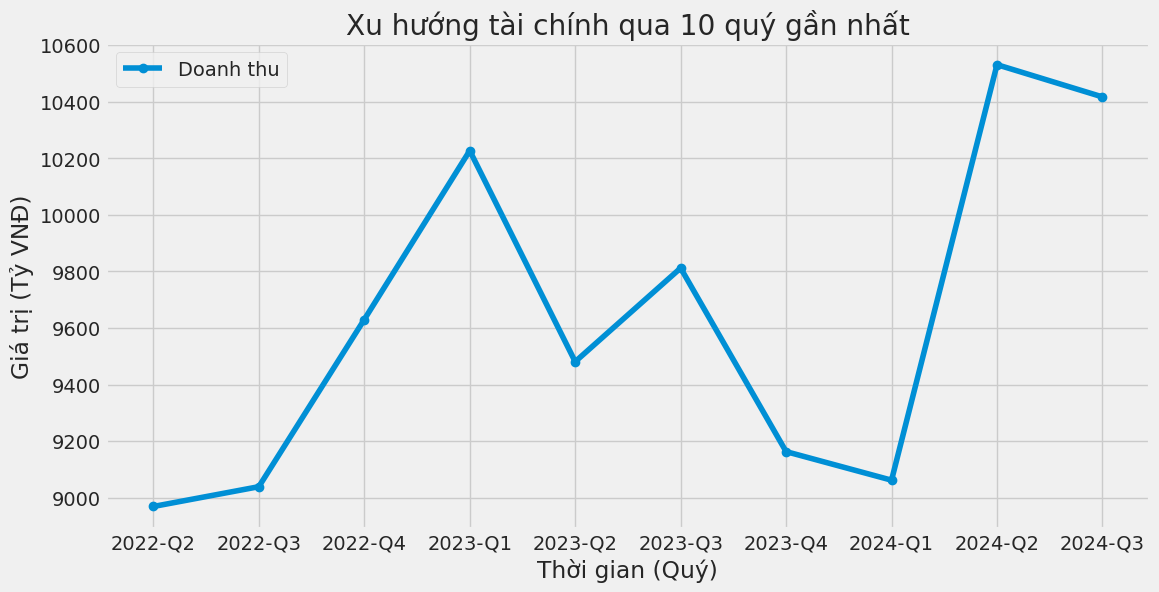

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(incomestatement_df['quarter'], incomestatement_df['revenue'], marker='o', label='Doanh thu')
plt.title('Xu hướng tài chính qua 10 quý gần nhất')
plt.xlabel('Thời gian (Quý)')
plt.ylabel('Giá trị (Tỷ VNĐ)')
# plt.xticks(rotation=45)
plt.legend()
# plt.grid()
plt.show()

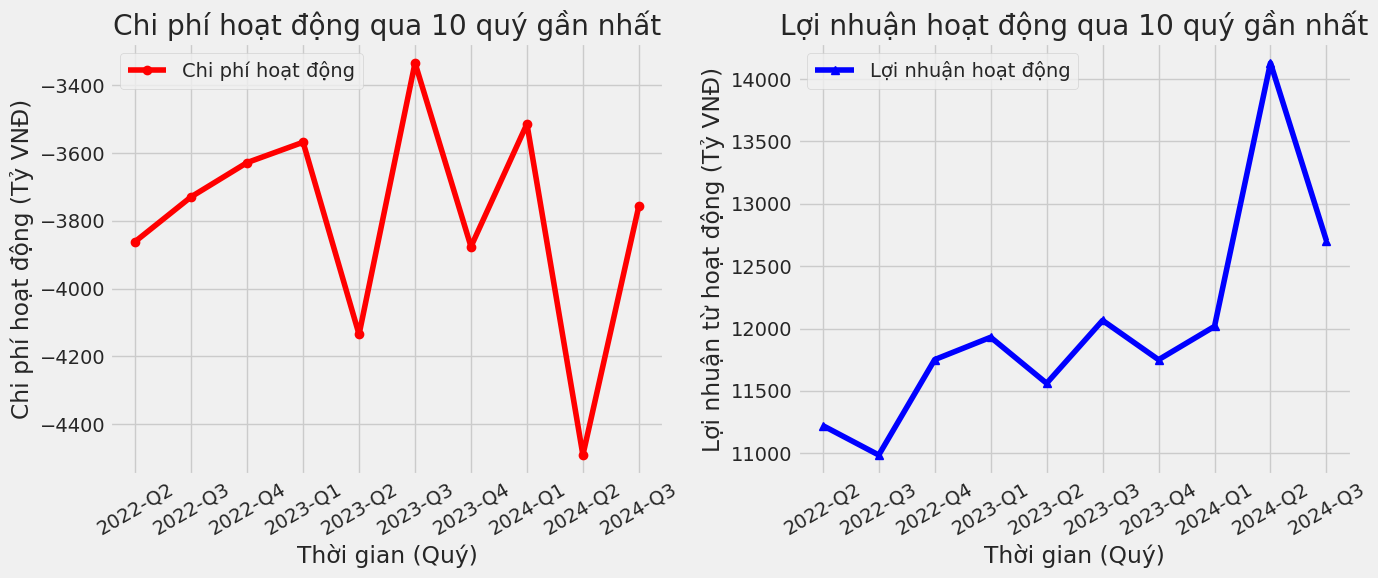

In [ ]:
import matplotlib.pyplot as plt

# Tạo figure với 2 biểu đồ riêng biệt (1 hàng, 2 cột) và trục y riêng biệt
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Biểu đồ 1: Chi phí hoạt động
axes[0].plot(incomestatement_df['quarter'], incomestatement_df['operationExpense'], marker='o', color='red', label='Chi phí hoạt động')
axes[0].set_title('Chi phí hoạt động qua 10 quý gần nhất')
axes[0].set_xlabel('Thời gian (Quý)')
axes[0].set_ylabel('Chi phí hoạt động (Tỷ VNĐ)')
axes[0].legend()
axes[0].grid(True)

# Biểu đồ 2: Thu nhập từ hoạt động
axes[1].plot(incomestatement_df['quarter'], incomestatement_df['operationProfit'], marker='^', color='blue', label='Lợi nhuận hoạt động')
axes[1].set_title('Lợi nhuận hoạt động qua 10 quý gần nhất')
axes[1].set_xlabel('Thời gian (Quý)')
axes[1].set_ylabel('Lợi nhuận từ hoạt động (Tỷ VNĐ)')
axes[1].legend()
axes[1].grid(True)

# Xoay trục x để tránh chồng chéo
for ax in axes:
    ax.tick_params(axis='x', rotation=30)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


### Balance Sheet: Bảng cân đối kế toán

In [ ]:
balancesheet = financial_flow(symbol="MBB", report_type='balancesheet', report_range='quarterly', get_all=False)
balance_df = pd.DataFrame(balancesheet)
balance_df.head(5)

ticker shortAsset  cash shortInvest shortReceivable inventory  \
index                                                                   
2024-Q3    MBB       None  3782        None            None      None   
2024-Q2    MBB       None  4329        None            None      None   
2024-Q1    MBB       None  3741        None            None      None   
2023-Q4    MBB       None  3675        None            None      None   
2023-Q3    MBB       None  3412        None            None      None   

        longAsset  fixedAsset    asset    debt  ... oweCentralBank  \
index                                           ...                  
2024-Q3      None        4876  1028819  918796  ...           5047   
2024-Q2      None        4916   988605  884391  ...           7404   
2024-Q1      None        5044   900647  799306  ...           3901   
2023-Q4      None        4854   944954  848242  ...              9   
2023-Q3      None        4827   815881  724118  ...             74   

        valuablePaper  payableInterest  receivableInterest  deposit  \
index                                                                 
2024-Q3        119551             8824                8867   627567   
2024-Q2         99400             9024                8376   618618   
2024-Q1        102483            11905                7797   558826   
2023-Q4        126463            13390                8669   567533   
2023-Q3        116032            12928                9981   479733   

         otherDebt   fund  unDistributedIncome  minorShareHolderProfit  \
index                                                                    
2024-Q3      44719  15149                34477                    4221   
2024-Q2      50420  15216                28691                    4066   
2024-Q1      47353  12156                30093                    4067   
2023-Q4      51628  12194                25560                    3973   
2023-Q3      49520  12255                20610                    3914   

         payable  
index             
2024-Q3   918796  
2024-Q2   884391  
2024-Q1   799306  
2023-Q4   848242  
2023-Q3   724118  

[5 rows x 35 columns]

In [ ]:
print(balance_df.columns)

Index(['ticker', 'shortAsset', 'cash', 'shortInvest', 'shortReceivable',
       'inventory', 'longAsset', 'fixedAsset', 'asset', 'debt', 'shortDebt',
       'longDebt', 'equity', 'capital', 'centralBankDeposit',
       'otherBankDeposit', 'otherBankLoan', 'stockInvest', 'customerLoan',
       'badLoan', 'provision', 'netCustomerLoan', 'otherAsset',
       'otherBankCredit', 'oweOtherBank', 'oweCentralBank', 'valuablePaper',
       'payableInterest', 'receivableInterest', 'deposit', 'otherDebt', 'fund',
       'unDistributedIncome', 'minorShareHolderProfit', 'payable'],
      dtype='object')


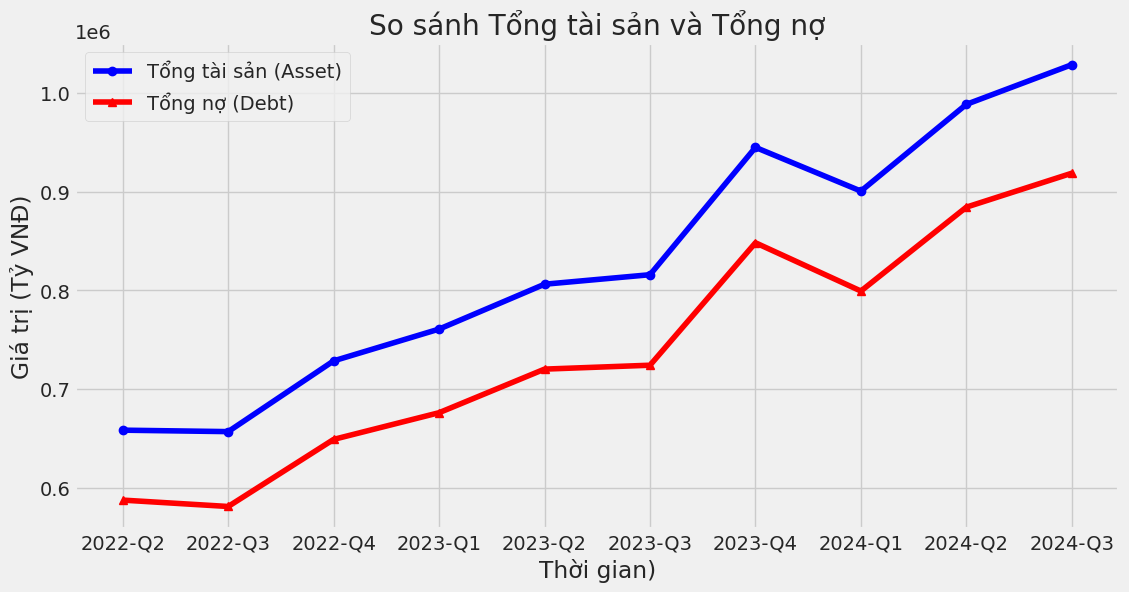

In [ ]:
# Vẽ biểu đồ so sánh Asset và Debt
plt.figure(figsize=(12, 6))
plt.plot(balance_df['asset'], marker='o', label='Tổng tài sản (Asset)', color='blue')
plt.plot(balance_df['debt'], marker='^', label='Tổng nợ (Debt)', color='red')

# Thiết lập tiêu đề và nhãn
plt.title('So sánh Tổng tài sản và Tổng nợ')
plt.xlabel('Thời gian)')
plt.ylabel('Giá trị (Tỷ VNĐ)')

# Hiển thị chú thích và lưới
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()

# Hiển thị biểu đồ
plt.show()


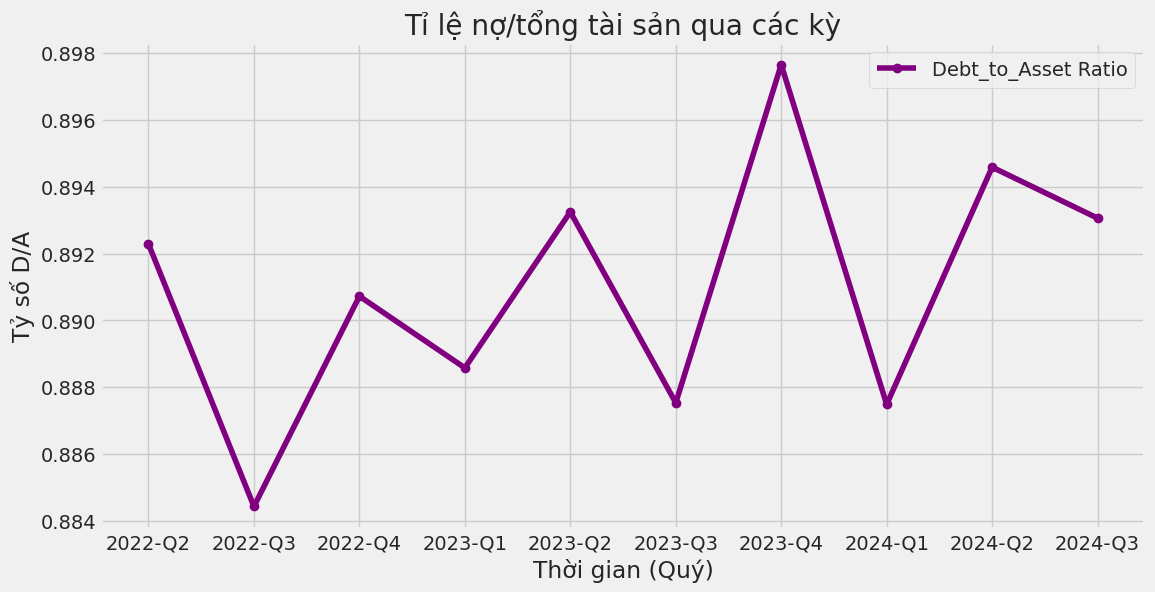

In [ ]:
# Tính Debt-to-Equity Ratio
balance_df['Debt_to_Asset'] = balance_df['debt'] / balance_df['asset']
balance_df['Debt_to_Equity'] = balance_df['debt'] / balance_df['equity']

# Trực quan hóa
plt.figure(figsize=(12, 6))
plt.plot(balance_df['Debt_to_Asset'], marker='o', color='purple', label='Debt_to_Asset Ratio')

# Thiết lập tiêu đề và nhãn
plt.title('Tỉ lệ nợ/tổng tài sản qua các kỳ')
plt.xlabel('Thời gian (Quý)')
plt.ylabel('Tỷ số D/A')
# plt.xticks(rotation=45)
plt.gca().invert_xaxis()
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()


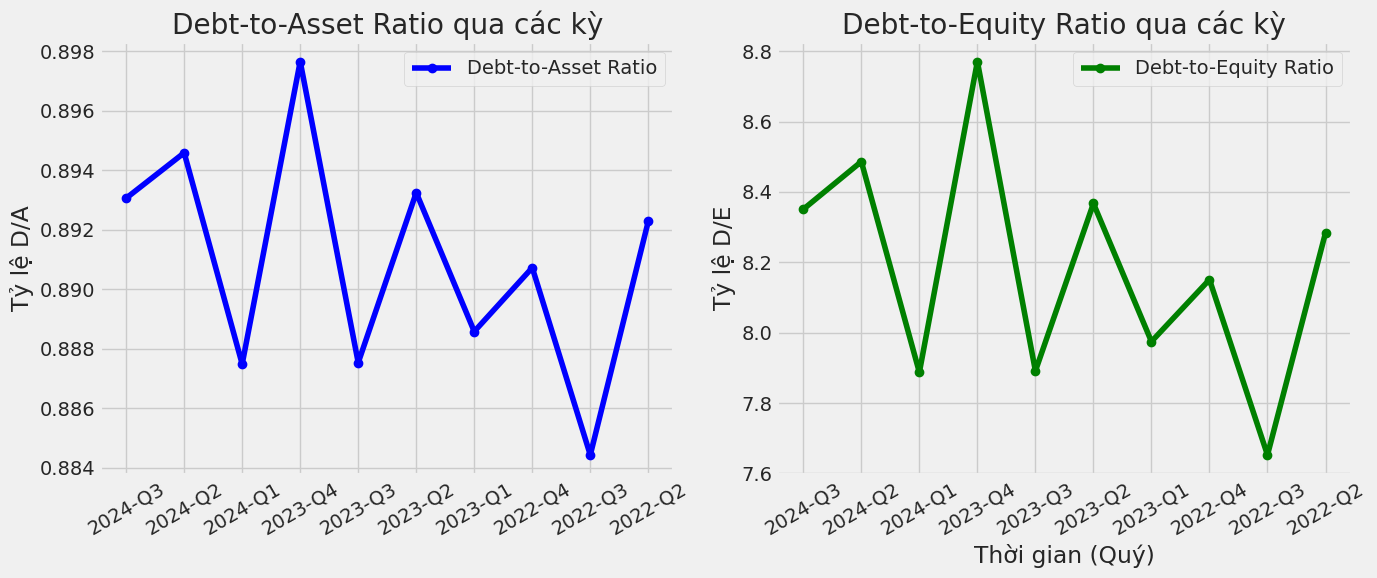

In [ ]:
# Vẽ hai biểu đồ tách biệt
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Biểu đồ Debt-to-Asset Ratio
axes[0].plot(balance_df['Debt_to_Asset'], marker='o', color='blue', label='Debt-to-Asset Ratio')
axes[0].set_title('Debt-to-Asset Ratio qua các kỳ')
axes[0].set_ylabel('Tỷ lệ D/A')
axes[0].legend()
axes[0].grid(True)

# Biểu đồ Debt-to-Equity Ratio
axes[1].plot(balance_df['Debt_to_Equity'], marker='o', color='green', label='Debt-to-Equity Ratio')
axes[1].set_title('Debt-to-Equity Ratio qua các kỳ')
axes[1].set_xlabel('Thời gian (Quý)')
axes[1].set_ylabel('Tỷ lệ D/E')
axes[1].legend()
axes[1].grid(True)

# Xoay nhãn trục x
for ax in axes:
    ax.tick_params(axis='x', rotation=30)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

### Cashflow: Báo cáo lưu chuyển tiền tệ

In [ ]:
cashflow = financial_flow(symbol="MBB", report_type='cashflow', report_range='quarterly', get_all=False)
cashflow_df = pd.DataFrame(cashflow)
cashflow_df.head(5)

ticker  investCost  fromInvest  fromFinancial  fromSale  freeCashFlow
index                                                                        
2024-Q3    MBB        -533        -529            395    -20490             0
2024-Q2    MBB        -291        -258           2322     12386             0
2024-Q1    MBB        -567        -542           1050    -25887             0
2023-Q4    MBB        -495        -462           3149     50355             0
2023-Q3    MBB        -266        -243          -1967     14595             0

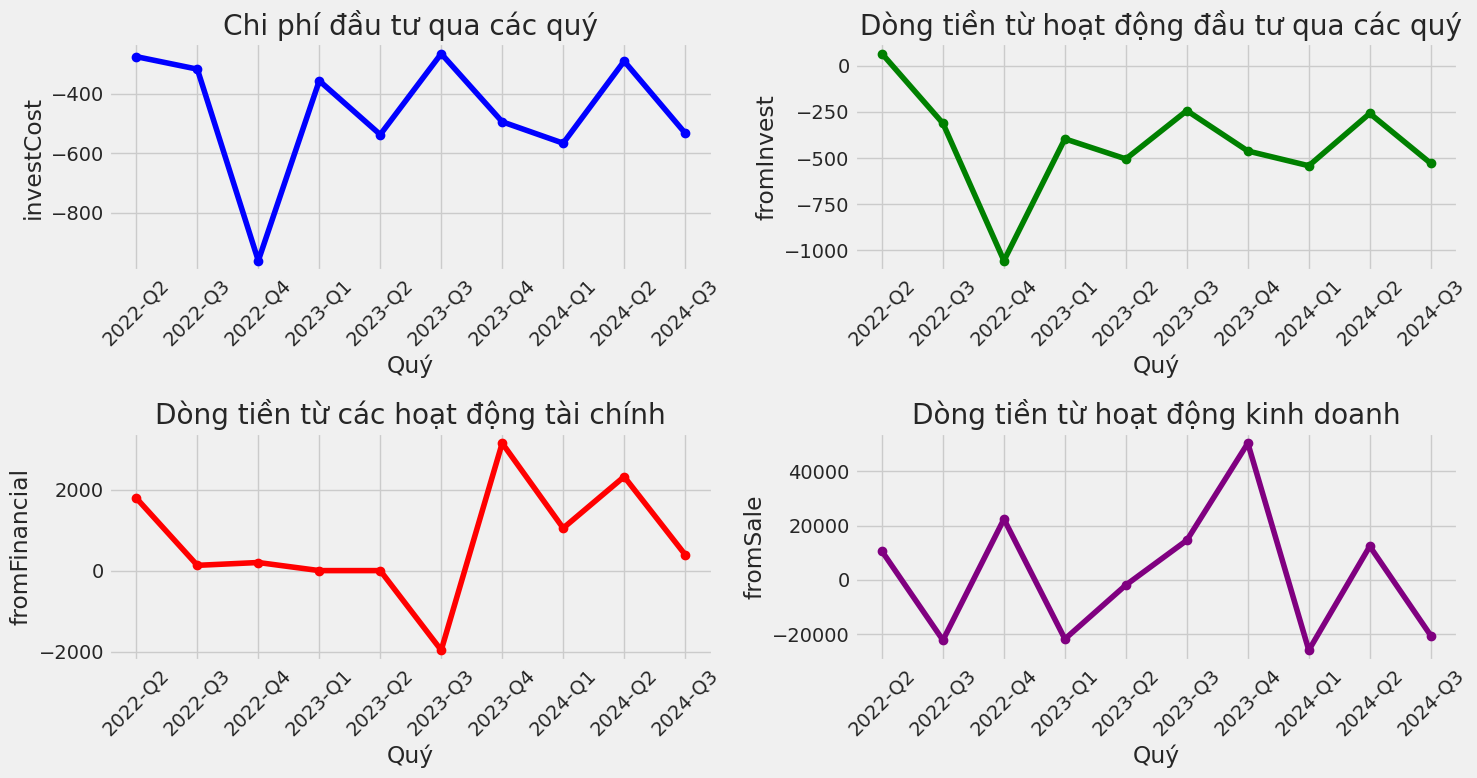

In [ ]:
# Thiết lập kích thước và số lượng biểu đồ
fig, axs = plt.subplots(2, 2, figsize=(15, 8))  # 2 hàng, 2 cột

# Vẽ biểu đồ P/E
axs[0, 0].plot(cashflow_df['investCost'], marker='o', color='blue')
axs[0, 0].set_title("Chi phí đầu tư qua các quý")
axs[0, 0].set_xlabel("Quý")
axs[0, 0].set_ylabel("investCost")
axs[0, 0].invert_xaxis()
axs[0, 0].tick_params(axis='x', rotation=45)

# Vẽ biểu đồ P/B
axs[0, 1].plot(cashflow_df['fromInvest'], marker='o', color='green')
axs[0, 1].set_title(" Dòng tiền từ hoạt động đầu tư qua các quý")
axs[0, 1].set_xlabel("Quý")
axs[0, 1].set_ylabel("fromInvest")
axs[0, 1].invert_xaxis()
axs[0, 1].tick_params(axis='x', rotation=45)

# Vẽ biểu đồ ROE
axs[1, 0].plot(cashflow_df['fromFinancial'], marker='o', color='red')
axs[1, 0].set_title("Dòng tiền từ các hoạt động tài chính")
axs[1, 0].set_xlabel("Quý")
axs[1, 0].set_ylabel("fromFinancial")
axs[1, 0].invert_xaxis()
axs[1, 0].tick_params(axis='x', rotation=45)

# Vẽ biểu đồ ROA
axs[1, 1].plot(cashflow_df['fromSale'], marker='o', color='purple')
axs[1, 1].set_title("Dòng tiền từ hoạt động kinh doanh")
axs[1, 1].set_xlabel("Quý")
axs[1, 1].set_ylabel("fromSale")
axs[1, 1].invert_xaxis()
axs[1, 1].tick_params(axis='x', rotation=45)

# Tinh chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

In [ ]:
# # Danh sách các mã cổ phiếu cần lấy dữ liệu
# tickers = ['VNM', 'FPT', 'HPG', 'VCB']

# # Tạo từ điển để lưu DataFrame của từng mã cổ phiếu
# all_historical_data = pd.DataFrame()

# # Lặp qua từng mã cổ phiếu và lấy dữ liệu lịch sử
# for ticker in tickers:
#     try:
#         # Lấy dữ liệu lịch sử cho từng mã cổ phiếu (từ ngày bắt đầu tới hiện tại)
#         historical_data = stock_historical_data(ticker, '2024-01-01', '2024-09-01')


#         # Gộp dữ liệu vào DataFrame tổng
#         all_historical_data = pd.concat([all_historical_data, historical_data], ignore_index=True)
#     except Exception as e:
#         print(f"Lỗi khi lấy dữ liệu cho mã {ticker}: {e}")

## Phân tích kỹ thuật (Technical Analysis)

In [ ]:
data = pd.read_csv('all_historical_data.csv')
data.head()

time   open   high    low  close    volume ticker
0  2023-01-03  13370  14190  13370  14190  18046200    SSI
1  2023-01-04  14420  14650  14230  14270  10680500    SSI
2  2023-01-05  14380  14540  14040  14500  13309500    SSI
3  2023-01-06  14500  14720  14190  14190  13143700    SSI
4  2023-01-09  14350  14540  14160  14270   9711500    SSI

In [ ]:
data.describe()

open          high           low         close        volume
count  4.044250e+05  4.044250e+05  4.044250e+05  4.044250e+05  4.044250e+05
mean   2.009632e+04  2.036509e+04  1.981146e+04  2.010366e+04  8.310574e+05
std    3.066172e+04  3.105323e+04  3.025738e+04  3.062691e+04  3.190187e+06
min    1.600000e+02  1.600000e+02  1.600000e+02  1.600000e+02  1.000000e+02
25%    7.300000e+03  7.420000e+03  7.190000e+03  7.300000e+03  1.500000e+03
50%    1.270000e+04  1.290000e+04  1.250000e+04  1.270000e+04  1.700000e+04
75%    2.399000e+04  2.428000e+04  2.364000e+04  2.400000e+04  2.662000e+05
max    1.562500e+06  1.562500e+06  1.358700e+06  1.358700e+06  1.271032e+08

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404425 entries, 0 to 404424
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   time    404425 non-null  object
 1   open    404425 non-null  int64 
 2   high    404425 non-null  int64 
 3   low     404425 non-null  int64 
 4   close   404425 non-null  int64 
 5   volume  404425 non-null  int64 
 6   ticker  404425 non-null  object
dtypes: int64(5), object(2)
memory usage: 21.6+ MB


In [ ]:
MBB = data[data['ticker'] == 'MBB'] #Mbbank
TCB = data[data['ticker'] == 'TCB'] #Techcombank
VPB = data[data['ticker'] == 'VPB'] #VPbank
VCB = data[data['ticker'] == 'VCB'] #Vietcombank

### Closing Price (Giá đóng cửa):


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

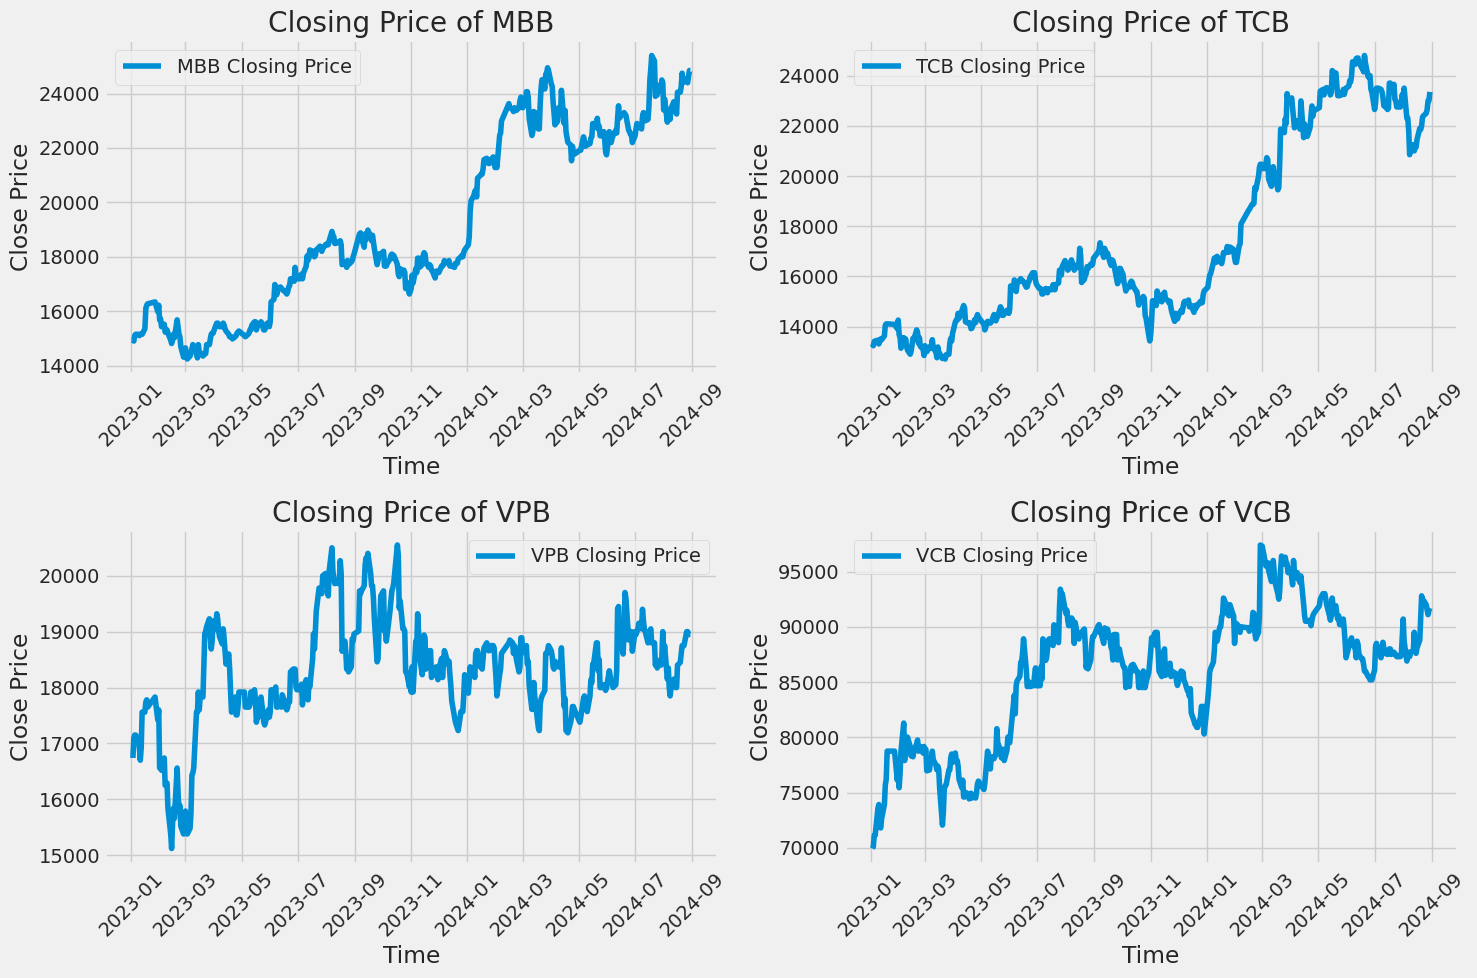

In [ ]:
# Danh sách các DataFrame và tên mã cổ phiếu
data_frames = {'MBB': MBB, 'TCB': TCB, 'VPB': VPB, 'VCB': VCB}
company_list = list(data_frames.keys())  # ['FPT', 'VNM', 'HPG', 'VCB']

# Cấu hình biểu đồ
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Lặp qua từng DataFrame và vẽ biểu đồ
for i, company_name in enumerate(company_list, 1):
    plt.subplot(2, 2, i)

    # Lấy DataFrame tương ứng
    df = data_frames[company_name]

    # Đảm bảo cột 'time' là kiểu datetime
    df['time'] = pd.to_datetime(df['time'])

    # Vẽ biểu đồ với trục x là 'time' và trục y là 'close'
    plt.plot(df['time'], df['close'], label=f'{company_name} Closing Price')

    # Định nghĩa các nhãn và tiêu đề
    plt.ylabel('Close Price')
    plt.xlabel('Time')
    plt.xticks(rotation=45)
    plt.title(f"Closing Price of {company_name}")

    # Hiển thị legend
    plt.legend()

# Tự động điều chỉnh layout và định dạng trục x
plt.tight_layout()
plt.show()


#### Phân tích chỉ số RSI (Relative Strength Index):

In [ ]:
def calculate_rsi(data, window=14):
    # Tính sự thay đổi giá hàng ngày
    delta = data['close'].diff()

    # Chia delta thành tăng (gain) và giảm (loss)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    # Tính trung bình động của gain và loss
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    # Tính RS và RSI
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

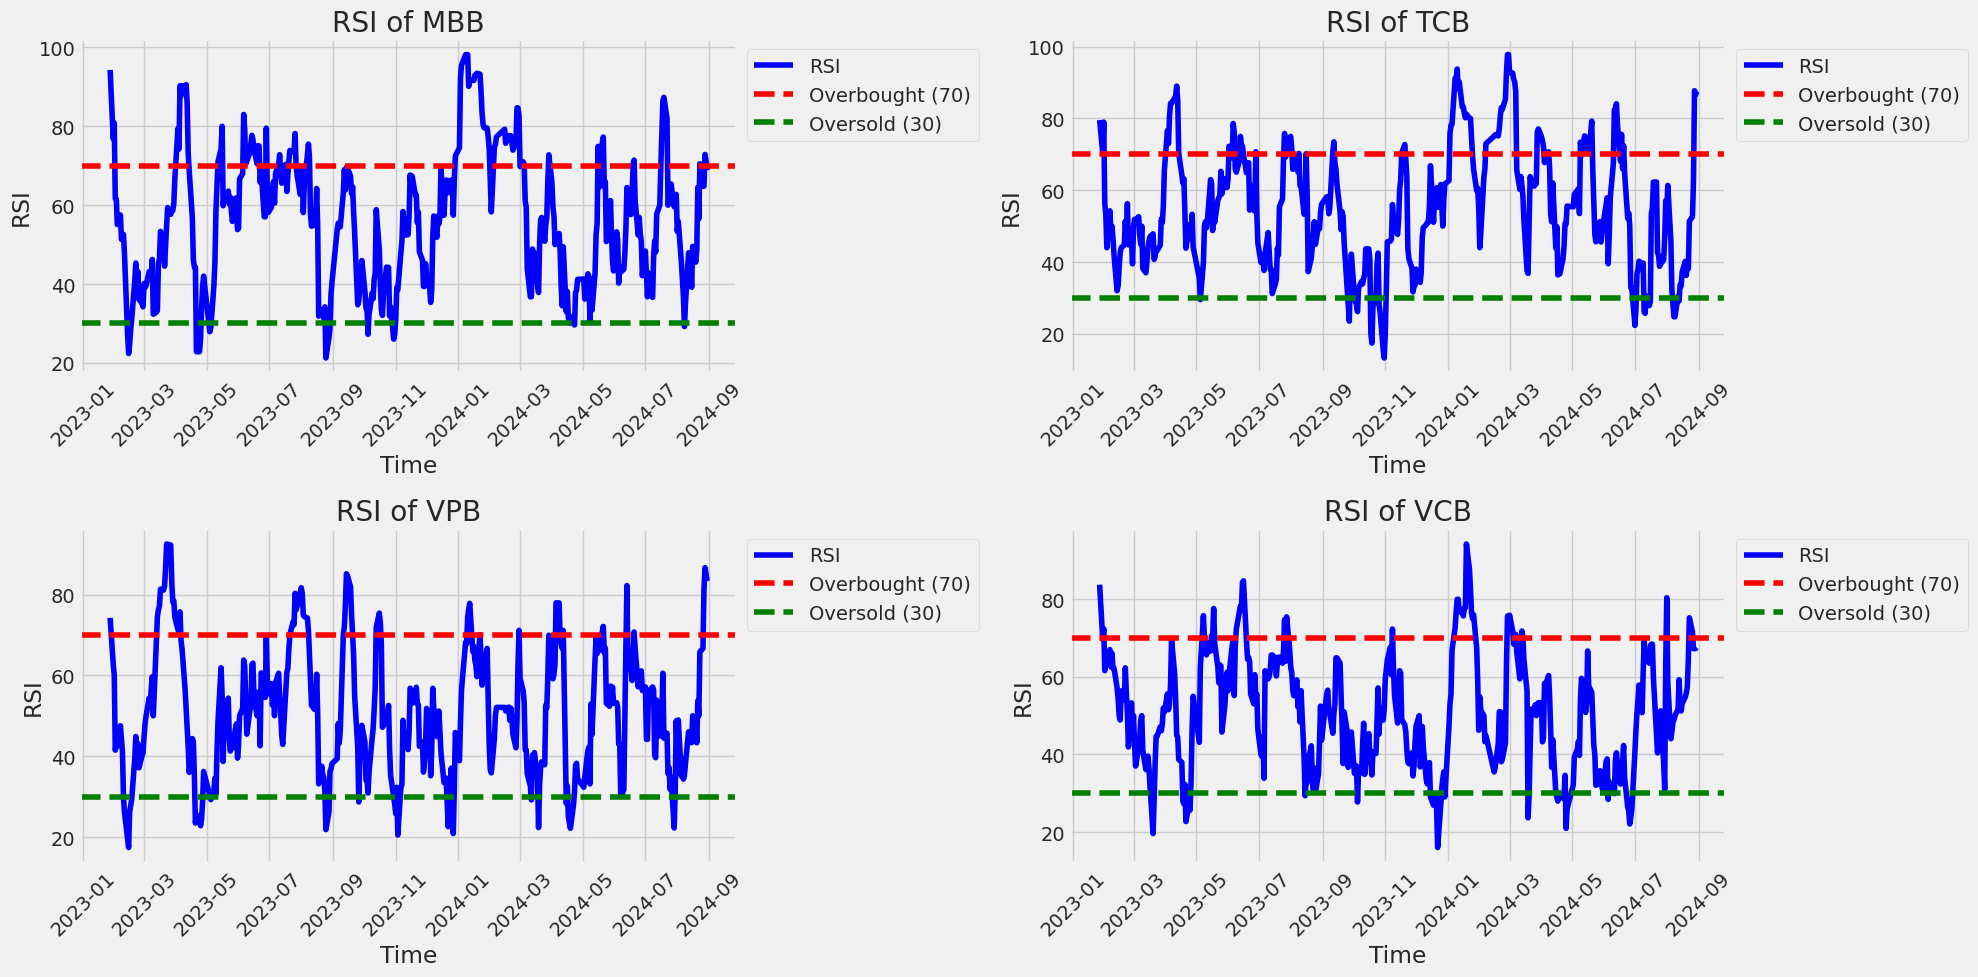

In [ ]:
# Thêm cột RSI cho từng công ty
for company_name in company_list:
    df = data_frames[company_name]
    df['RSI'] = calculate_rsi(df)

# Vẽ biểu đồ RSI cho 4 công ty
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

for i, company_name in enumerate(company_list):
    df = data_frames[company_name]

    # Đảm bảo cột 'time' là kiểu datetime
    df['time'] = pd.to_datetime(df['time'])

    # Xác định vị trí biểu đồ
    row = i // 2
    col = i % 2

    # Vẽ biểu đồ RSI
    axes[row, col].plot(df['time'], df['RSI'], label='RSI', color='blue')
    axes[row, col].axhline(70, color='red', linestyle='--', label='Overbought (70)')
    axes[row, col].axhline(30, color='green', linestyle='--', label='Oversold (30)')

    # Thiết lập tiêu đề và trục
    axes[row, col].set_title(f'RSI of {company_name}')
    axes[row, col].set_ylabel('RSI')
    axes[row, col].set_xlabel('Time')
    axes[row, col].tick_params(axis='x', rotation=45)
    # axes[row, col].legend()
    axes[row, col].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Điều chỉnh layout
fig.tight_layout()

# Hiển thị biểu đồ
plt.show()

#### Phân tích Bollinger Bands:

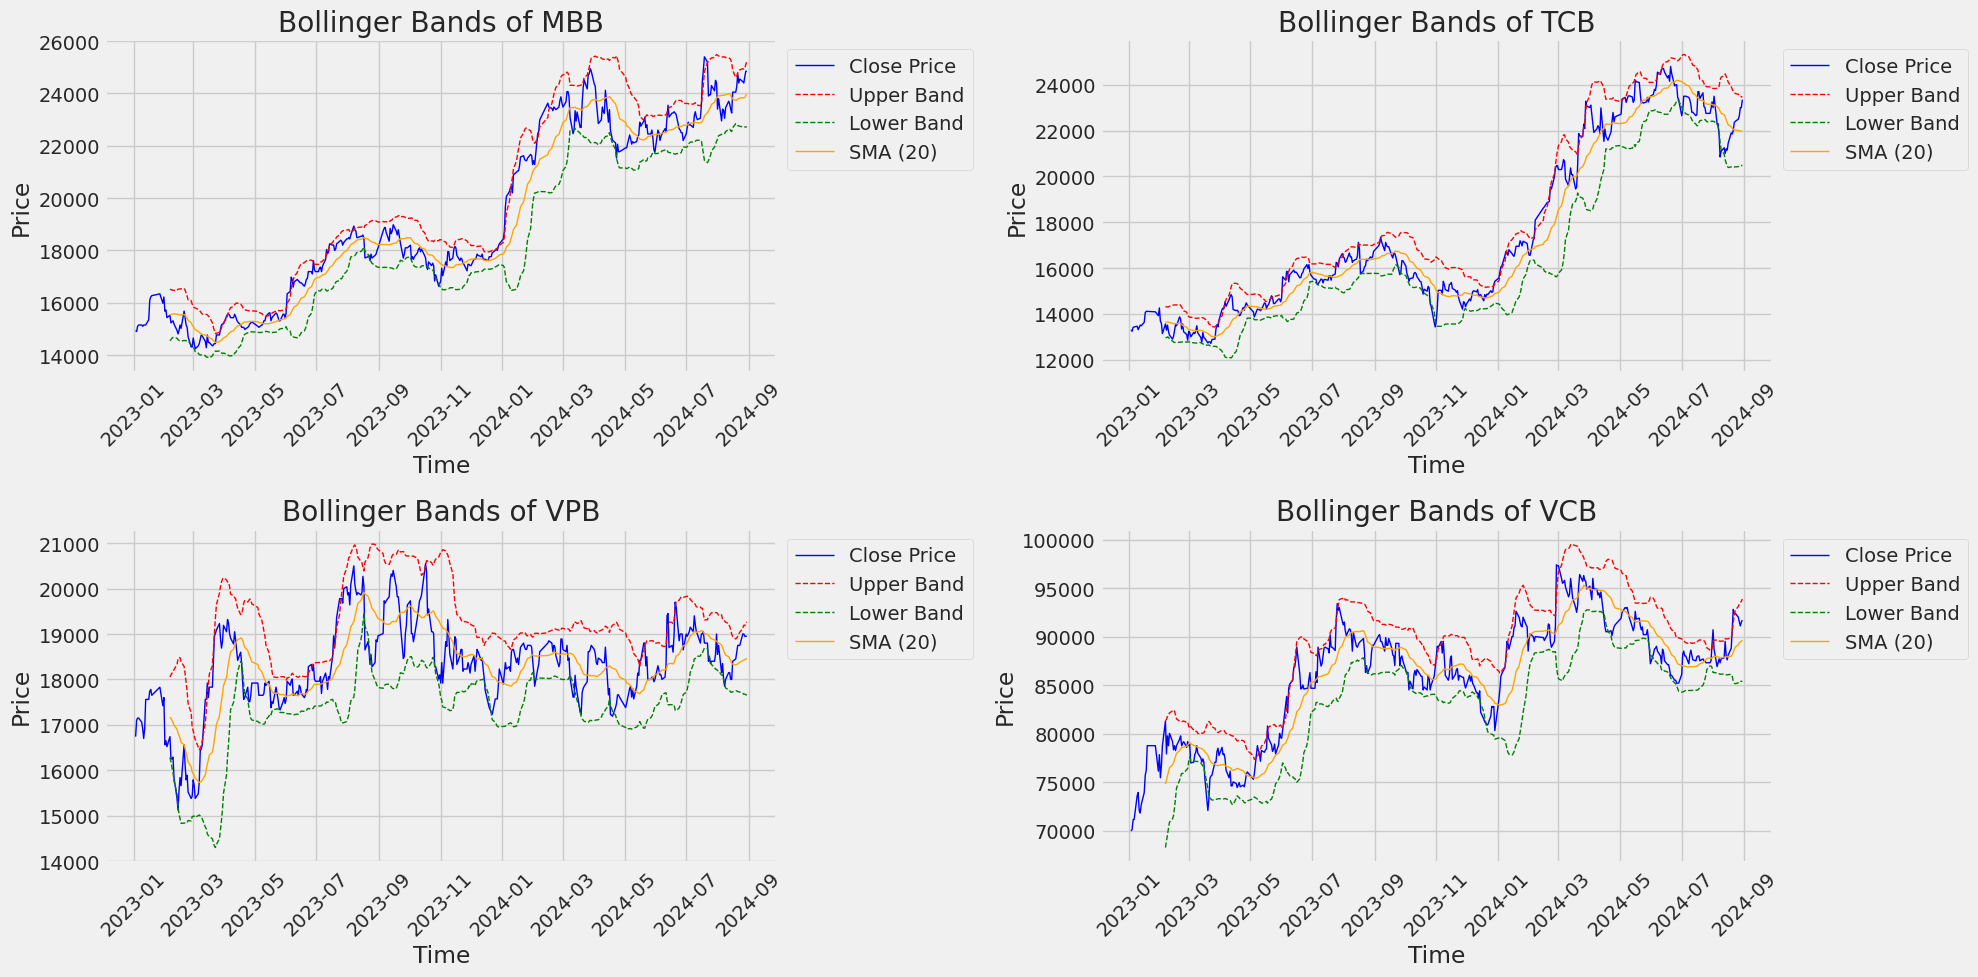

In [ ]:
# Tính Bollinger Bands
def calculate_bollinger_bands(data, window=20):
    # Đường trung bình động đơn giản (SMA)
    data['SMA'] = data['close'].rolling(window=window).mean()

    # Độ lệch chuẩn
    data['STD'] = data['close'].rolling(window=window).std()

    # Dải Bollinger
    data['Upper Band'] = data['SMA'] + (2 * data['STD'])
    data['Lower Band'] = data['SMA'] - (2 * data['STD'])
    return data


for company_name in company_list:
    df = data_frames[company_name]
    df = calculate_bollinger_bands(df)
    data_frames[company_name] = df

# Vẽ biểu đồ Bollinger Bands
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

for i, company_name in enumerate(company_list):
    df = data_frames[company_name]

    # Đảm bảo cột 'time' là kiểu datetime
    df['time'] = pd.to_datetime(df['time'])

    # Xác định vị trí biểu đồ
    row = i // 2
    col = i % 2

    # Vẽ giá đóng cửa và Bollinger Bands
    axes[row, col].plot(df['time'], df['close'], label='Close Price', color='blue', linewidth = 1)
    axes[row, col].plot(df['time'], df['Upper Band'], label='Upper Band', color='red', linestyle='--', linewidth = 1)
    axes[row, col].plot(df['time'], df['Lower Band'], label='Lower Band', color='green', linestyle='--', linewidth = 1)
    axes[row, col].plot(df['time'], df['SMA'], label='SMA (20)', color='orange', linewidth = 1)

    # Thiết lập tiêu đề và trục
    axes[row, col].set_title(f'Bollinger Bands of {company_name}')
    axes[row, col].set_ylabel('Price')
    axes[row, col].set_xlabel('Time')
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Điều chỉnh layout
fig.tight_layout()

# Hiển thị biểu đồ
plt.show()


### Sale Volume (Khối lượng giao dịch):

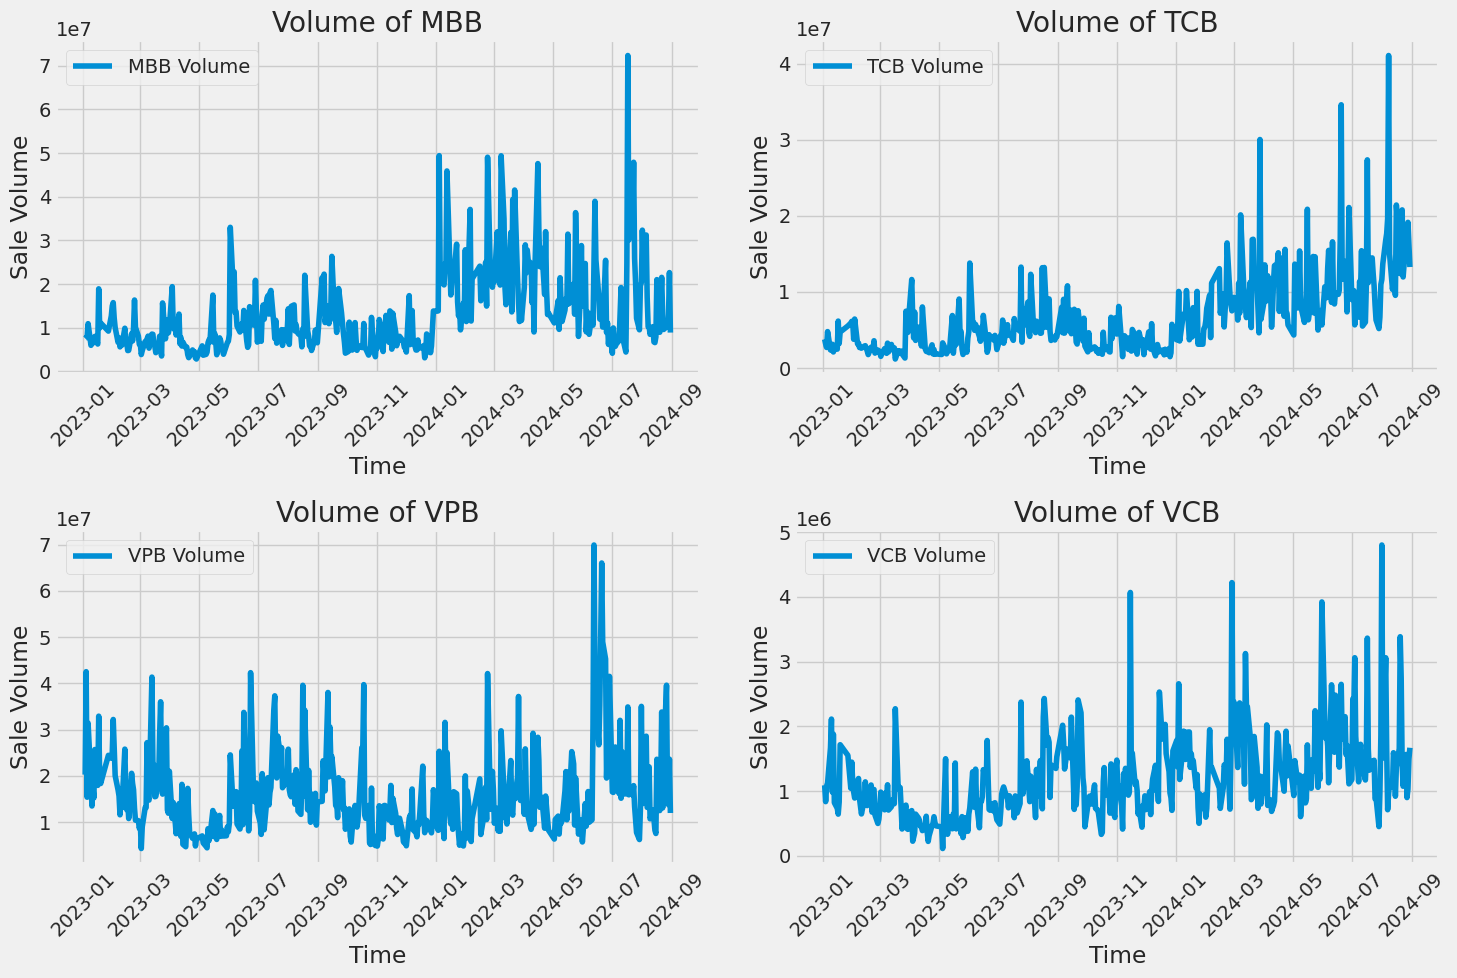

In [ ]:
# Cấu hình biểu đồ
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Lặp qua từng DataFrame và vẽ biểu đồ
for i, company_name in enumerate(company_list, 1):
    plt.subplot(2, 2, i)

    # Lấy DataFrame tương ứng
    df = data_frames[company_name]

    # Đảm bảo cột 'time' là kiểu datetime
    df['time'] = pd.to_datetime(df['time'])

    # Vẽ biểu đồ với trục x là 'time' và trục y là 'close'
    plt.plot(df['time'], df['volume'], label=f'{company_name} Volume')

    # Định nghĩa các nhãn và tiêu đề
    plt.ylabel('Sale Volume')
    plt.xlabel('Time')
    plt.title(f"Volume of {company_name}")
    plt.xticks(rotation=45)

    # Hiển thị legend
    plt.legend()

# Tự động điều chỉnh layout và định dạng trục x
plt.tight_layout()
plt.show()


### Daily Return:

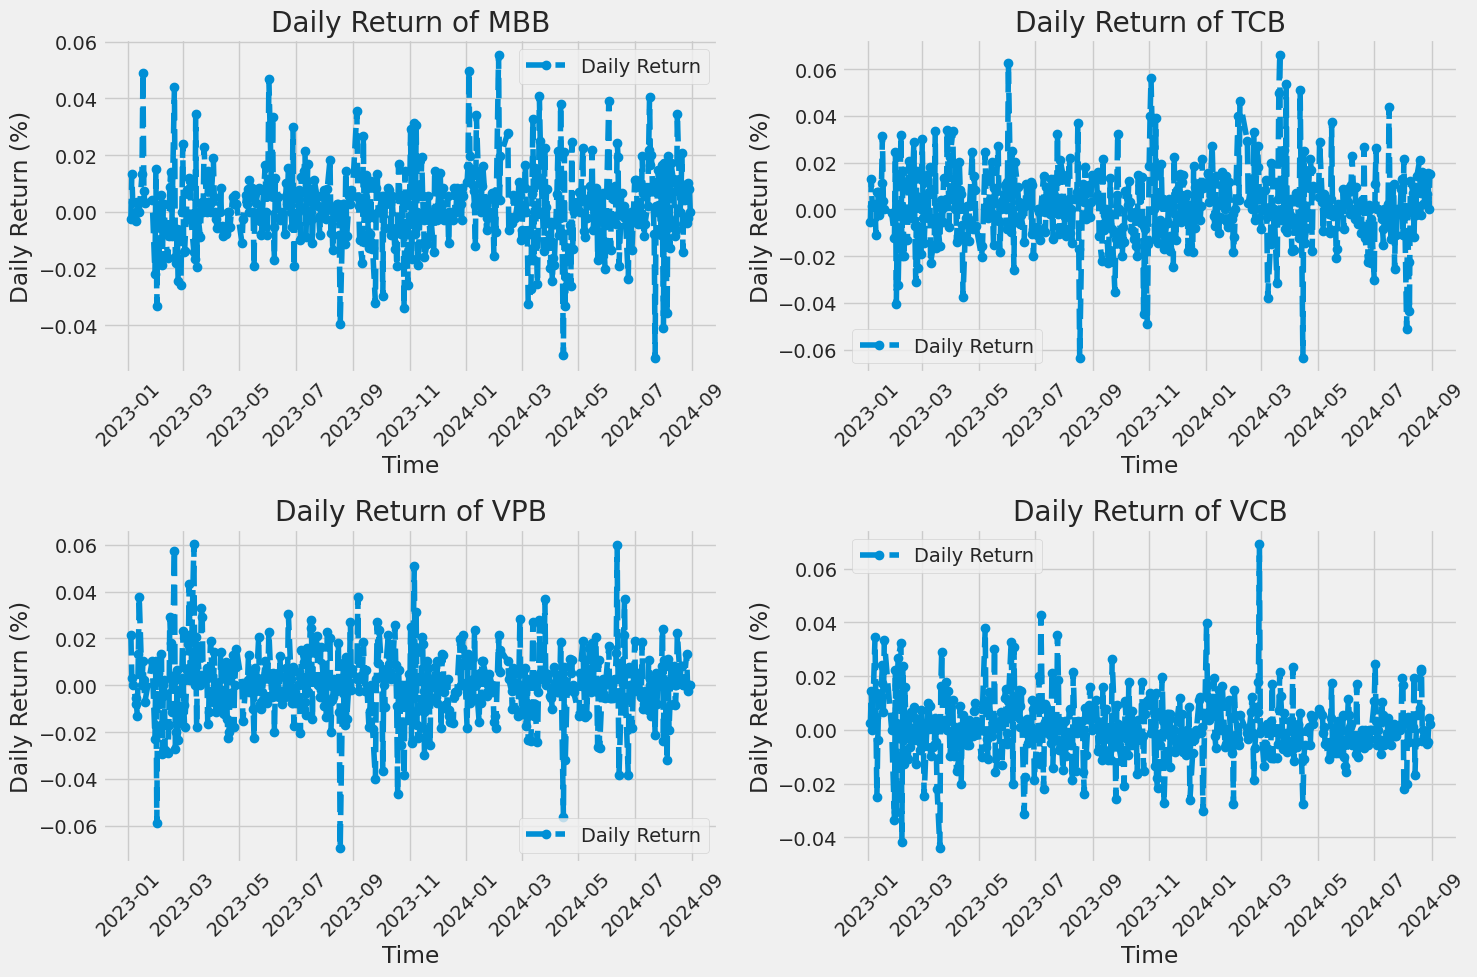

In [ ]:
# Tính toán phần trăm thay đổi hàng ngày (Daily Return)
for company_name in company_list:
    df = data_frames[company_name]
    df['Daily Return'] = df['close'].pct_change()  # Tính phần trăm thay đổi hàng ngày

# Tạo biểu đồ với layout 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Vẽ biểu đồ cho từng công ty
for i, company_name in enumerate(company_list):
    df = data_frames[company_name]

    # Đảm bảo cột 'time' là kiểu datetime
    df['time'] = pd.to_datetime(df['time'])

    # Xác định vị trí biểu đồ (hàng, cột)
    row = i // 2
    col = i % 2

    # Vẽ biểu đồ Daily Return với trục x là 'time'
    axes[row, col].plot(df['time'], df['Daily Return'], label='Daily Return', linestyle='--', marker='o')

    # Đặt tiêu đề và nhãn trục
    axes[row, col].set_title(f'Daily Return of {company_name}')
    axes[row, col].set_ylabel('Daily Return (%)')
    axes[row, col].set_xlabel('Time')

    # Hiển thị chú thích (legend)
    axes[row, col].legend()
    axes[row, col].tick_params(axis='x', rotation=45)

# Điều chỉnh layout để tránh chồng chéo
fig.tight_layout()

# Hiển thị biểu đồ
plt.show()

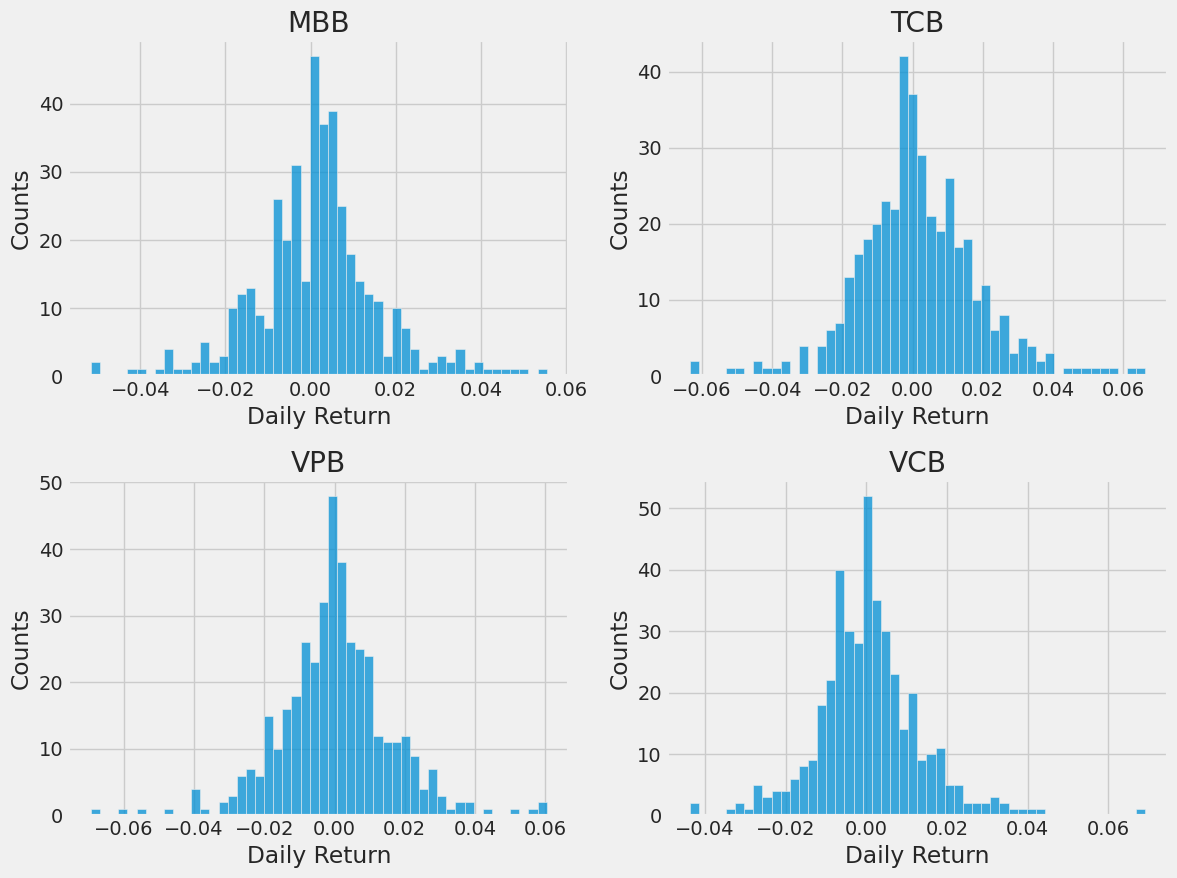

In [ ]:
# Tạo biểu đồ histogram
plt.figure(figsize=(12, 9))

for i, company_name in enumerate(company_list, 1):
    # Lấy DataFrame của công ty hiện tại
    df = data_frames[company_name]

    # Vẽ histogram
    plt.subplot(2, 2, i)
    df['Daily Return'].hist(bins=50, alpha=0.75)

    # Đặt tiêu đề và nhãn
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name}')

plt.tight_layout()
plt.show()

### Mối tương quan của giá đóng cửa giữa các cổ phiếu khác nhau:

In [ ]:
# Tạo một DataFrame chứa tất cả giá đóng cửa
closing_df = pd.DataFrame()

for company_name in company_list:
    df = data_frames[company_name]

    # Đảm bảo cột 'time' là dạng datetime
    df['time'] = pd.to_datetime(df['time'])

    # Gán giá đóng cửa với tên cột là mã cổ phiếu
    closing_df[company_name] = df.set_index('time')['close']

# Tính tỷ lệ thay đổi phần trăm hàng ngày (Daily Return)
tech_rets = closing_df.pct_change()

# Hiển thị một vài dòng đầu tiên
tech_rets.head()

MBB       TCB       VPB       VCB
time                                              
2023-01-03       NaN       NaN       NaN       NaN
2023-01-04 -0.002677 -0.005259  0.021505  0.002431
2023-01-05  0.013423  0.012840  0.002924  0.014549
2023-01-06  0.003311  0.001491  0.000000  0.000000
2023-01-09  0.000000  0.002234 -0.005248  0.034444

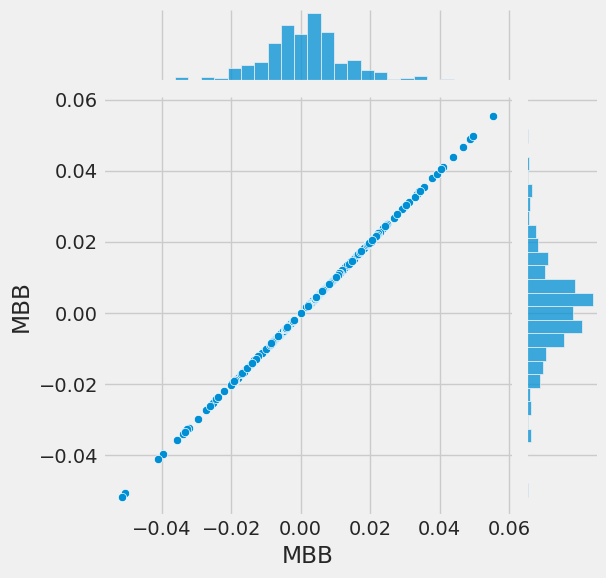

In [ ]:
sns.jointplot(x='MBB', y='MBB', data=tech_rets, kind='scatter')

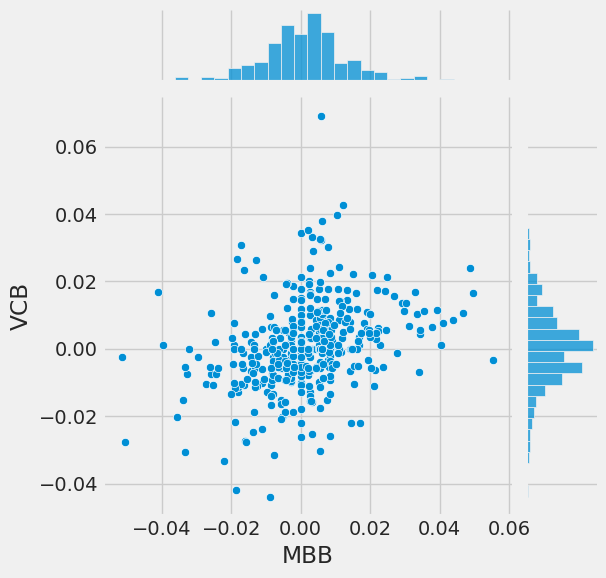

In [ ]:
sns.jointplot(x='MBB', y='VCB', data=tech_rets, kind='scatter')

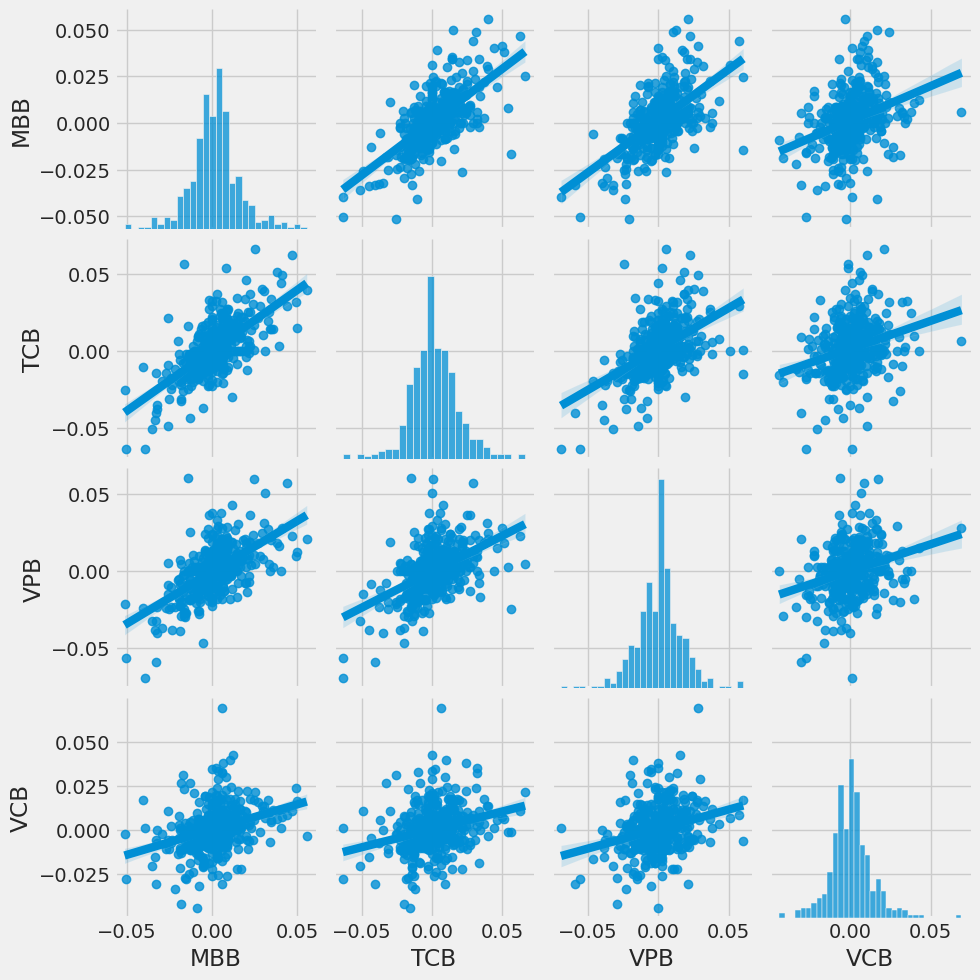

In [ ]:
sns.pairplot(tech_rets, kind='reg')

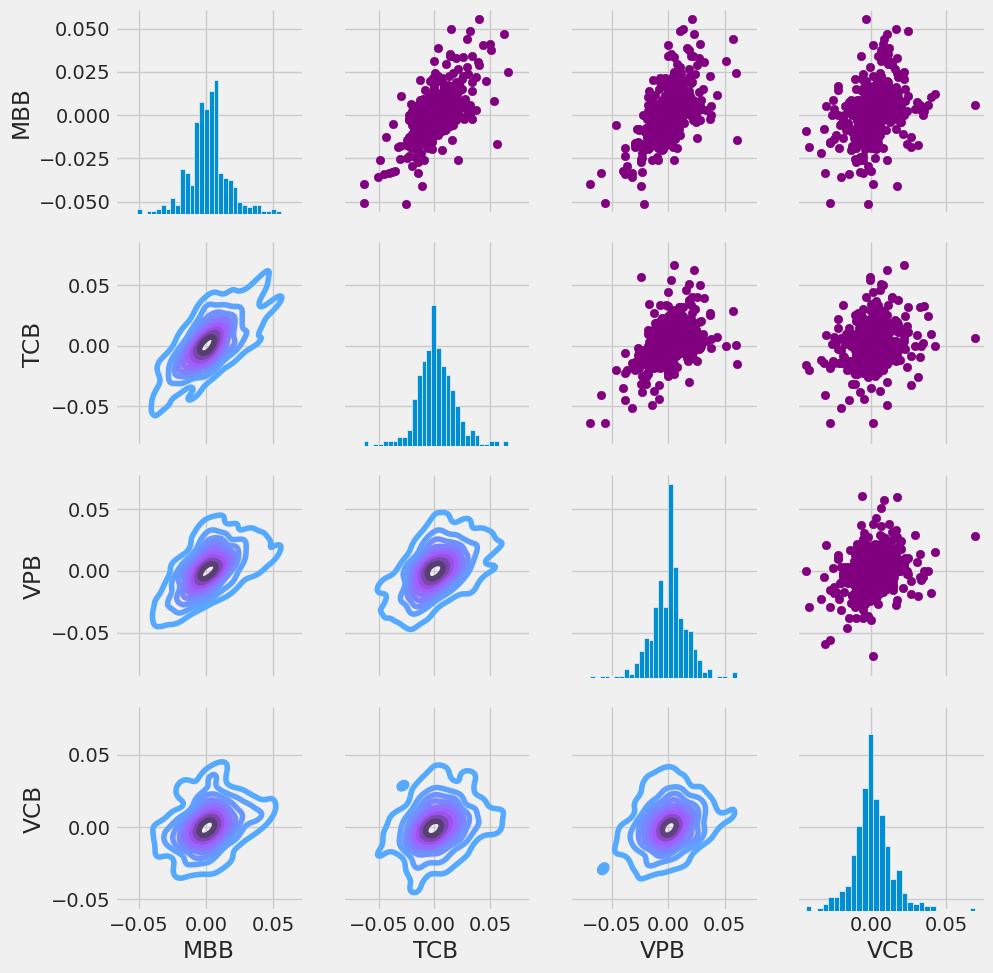

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

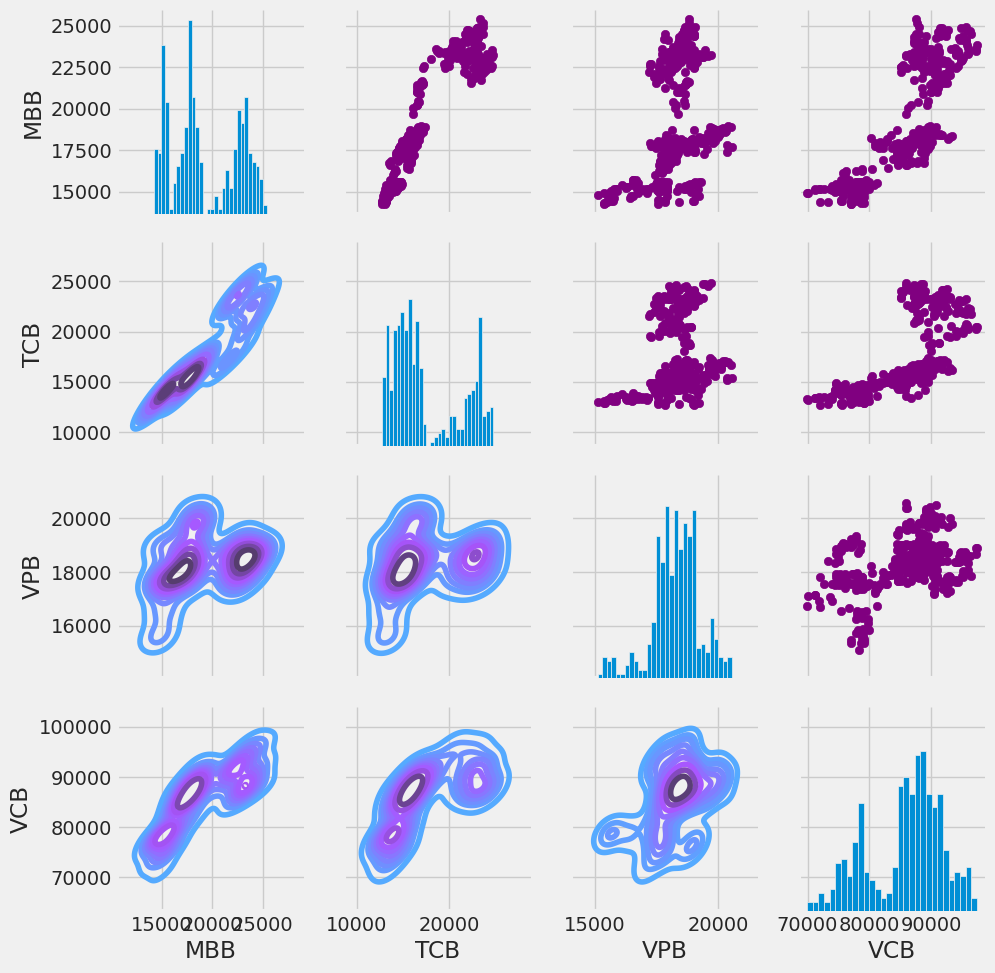

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

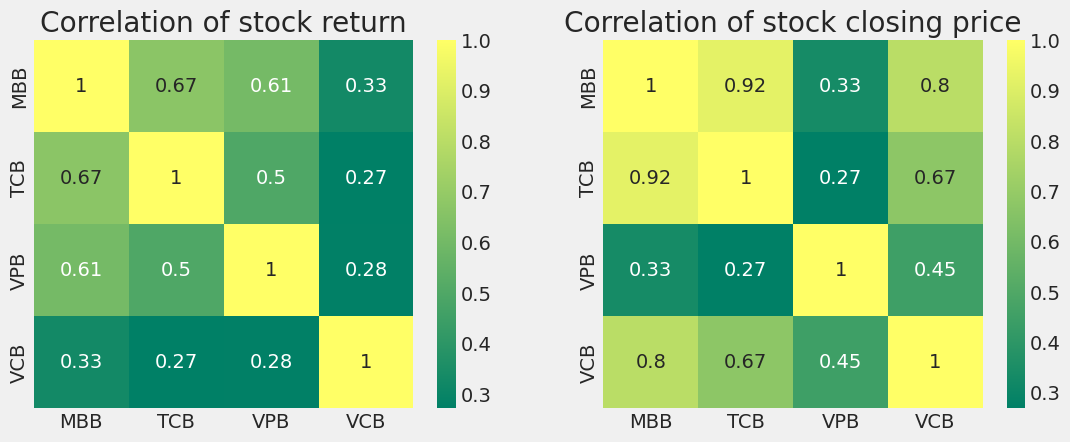

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

### Rủi ro đầu tư (Risk):

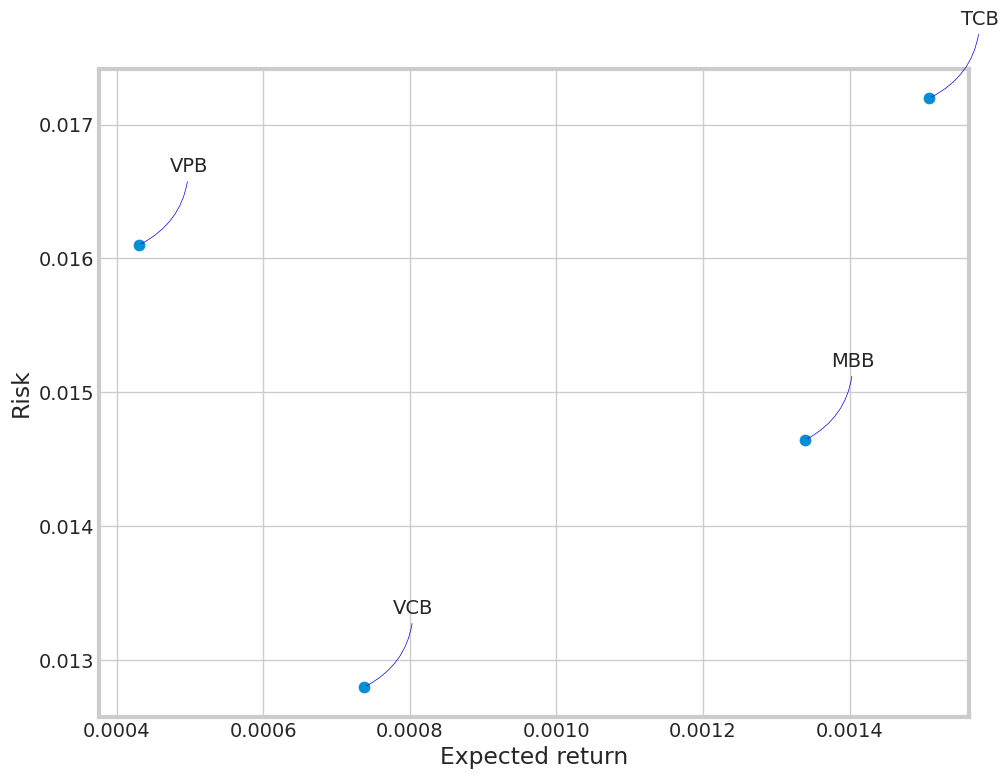

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

##Dự đoán giá đóng cửa (Stock closing price prediction):

### Moving Average (Đường trung bình động):

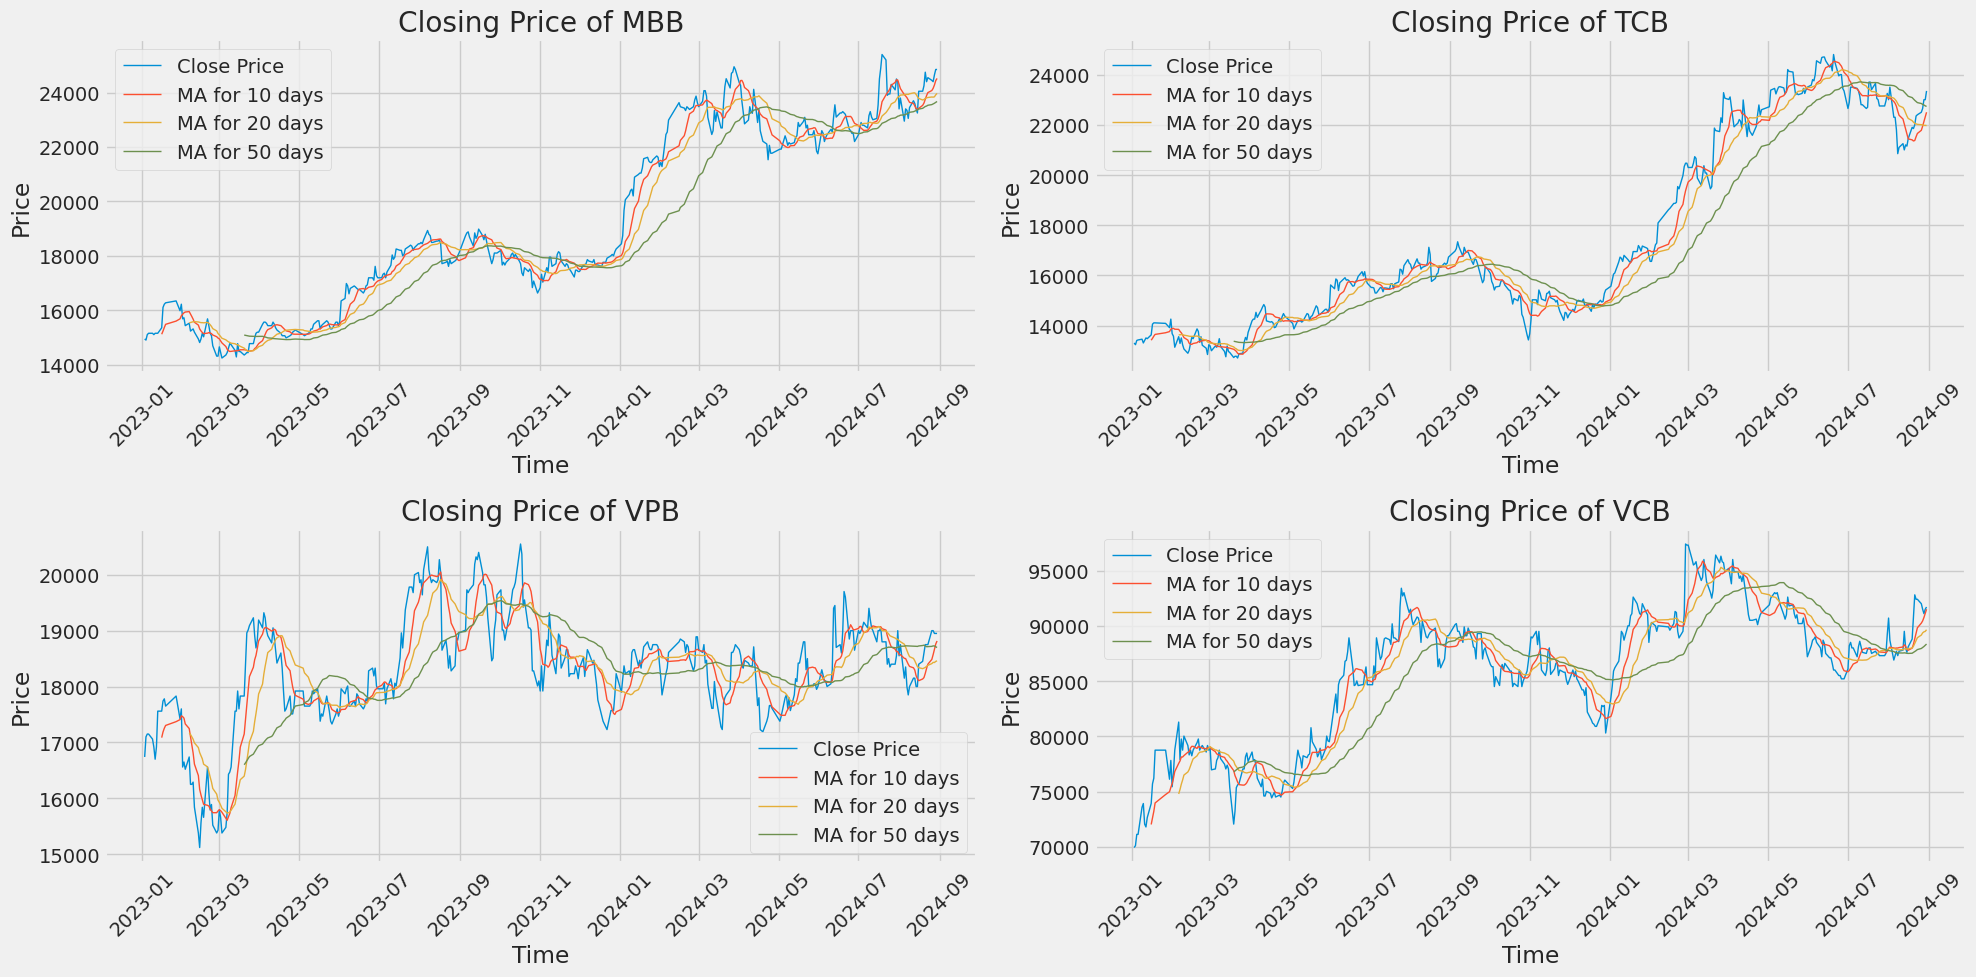

In [ ]:
# Danh sách các DataFrame và tên mã cổ phiếu

# Các kỳ trung bình động (MA) cần tính
ma_days = [10, 20, 50]
rmse_results = {company: {} for company in company_list}

# Tính các đường MA cho mỗi công ty
for ma in ma_days:
    for company_name in company_list:
        df = data_frames[company_name]
        column_name = f"MA for {ma} days"
        df[column_name] = df['close'].rolling(ma).mean()

        # Tính RMSE (bỏ qua giá trị NaN do rolling)
        valid_values = ~df[column_name].isna()
        rmse = np.sqrt(np.mean((df.loc[valid_values, 'close'] - df.loc[valid_values, column_name])**2))
        rmse_results[company_name][column_name] = rmse

# Tạo biểu đồ với layout 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Vẽ biểu đồ cho từng công ty
for i, company_name in enumerate(company_list):
    df = data_frames[company_name]

    # Đảm bảo cột 'time' là kiểu datetime
    df['time'] = pd.to_datetime(df['time'])

    # Xác định vị trí biểu đồ (hàng, cột)
    row = i // 2
    col = i % 2

    # Vẽ biểu đồ với trục x là 'time' và trục y là các giá trị
    axes[row, col].plot(df['time'], df['close'], label='Close Price', linewidth = 1)
    axes[row, col].plot(df['time'], df['MA for 10 days'], label='MA for 10 days', linewidth = 1)
    axes[row, col].plot(df['time'], df['MA for 20 days'], label='MA for 20 days', linewidth = 1)
    axes[row, col].plot(df['time'], df['MA for 50 days'], label='MA for 50 days', linewidth = 1)

    # Đặt tiêu đề và nhãn trục
    axes[row, col].set_title(f'Closing Price of {company_name}')
    axes[row, col].set_ylabel('Price')
    axes[row, col].set_xlabel('Time')

    # Hiển thị chú thích (legend)
    axes[row, col].legend()
    axes[row, col].tick_params(axis='x', rotation=45)

# Điều chỉnh layout để tránh chồng chéo
fig.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [ ]:
for company, metrics in rmse_results.items():
    print(f"RMSE for {company}:")
    for ma_column, rmse_value in metrics.items():
        print(f"  {ma_column}: {rmse_value:.2f}")

RMSE for MBB:
  MA for 10 days: 499.74
  MA for 20 days: 707.95
  MA for 50 days: 1257.43
RMSE for TCB:
  MA for 10 days: 523.38
  MA for 20 days: 745.46
  MA for 50 days: 1373.79
RMSE for VPB:
  MA for 10 days: 477.13
  MA for 20 days: 655.26
  MA for 50 days: 799.07
RMSE for VCB:
  MA for 10 days: 1613.68
  MA for 20 days: 2227.12
  MA for 50 days: 3451.99


#### Dự đoán bằng đường trung bình động:

In [ ]:
data = stock_historical_data(symbol='MBB', start_date='2015-01-01', end_date='2024-09-01')
data

time   open   high    low  close    volume ticker
0     2015-01-05   3580   3580   3550   3550    338650    MBB
1     2015-01-06   3550   3690   3550   3670   2865710    MBB
2     2015-01-07   3690   3780   3670   3690   2235000    MBB
3     2015-01-08   3690   3780   3690   3730    853040    MBB
4     2015-01-09   3730   3940   3730   3910   6690100    MBB
...          ...    ...    ...    ...    ...       ...    ...
2408  2024-08-26  24700  24800  24300  24450  10218000    MBB
2409  2024-08-27  24350  24500  24300  24400  10098000    MBB
2410  2024-08-28  24450  24700  24350  24650  12094000    MBB
2411  2024-08-29  24650  25200  24650  24850  22617900    MBB
2412  2024-08-30  24850  25000  24800  24850   8869300    MBB

[2413 rows x 7 columns]

In [ ]:
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)

In [ ]:
data.head()

open  high   low  close   volume ticker
time                                               
2015-01-05  3580  3580  3550   3550   338650    MBB
2015-01-06  3550  3690  3550   3670  2865710    MBB
2015-01-07  3690  3780  3670   3690  2235000    MBB
2015-01-08  3690  3780  3690   3730   853040    MBB
2015-01-09  3730  3940  3730   3910  6690100    MBB

In [ ]:
mbb = data[['close']]
mbb.head()

close
time             
2015-01-05   3550
2015-01-06   3670
2015-01-07   3690
2015-01-08   3730
2015-01-09   3910

In [ ]:
# Tạo split tỉ lệ 80%/20%

split = int(0.8*len(mbb))
# Chia thành train và test set

train, test = mbb[:split], mbb[split:]
mbb.shape, train.shape, test.shape

((2413, 1), (1930, 1), (483, 1))

In [ ]:
train.index.min(), train.index.max(), test.index.min(), test.index.max()

(Timestamp('2015-01-05 00:00:00'),
 Timestamp('2022-09-27 00:00:00'),
 Timestamp('2022-09-28 00:00:00'),
 Timestamp('2024-08-30 00:00:00'))

In [ ]:
# Tạo dự đoán cho test set
preds = []
for i in range(0,483):
    a = train[len(train)-483+i:].sum() + sum(preds)
    b = a/483
    preds.append(b)

In [ ]:
rmse = np.sqrt(np.mean(np.power((np.array(test)-preds),2)))
rmse

2506.6044300821704

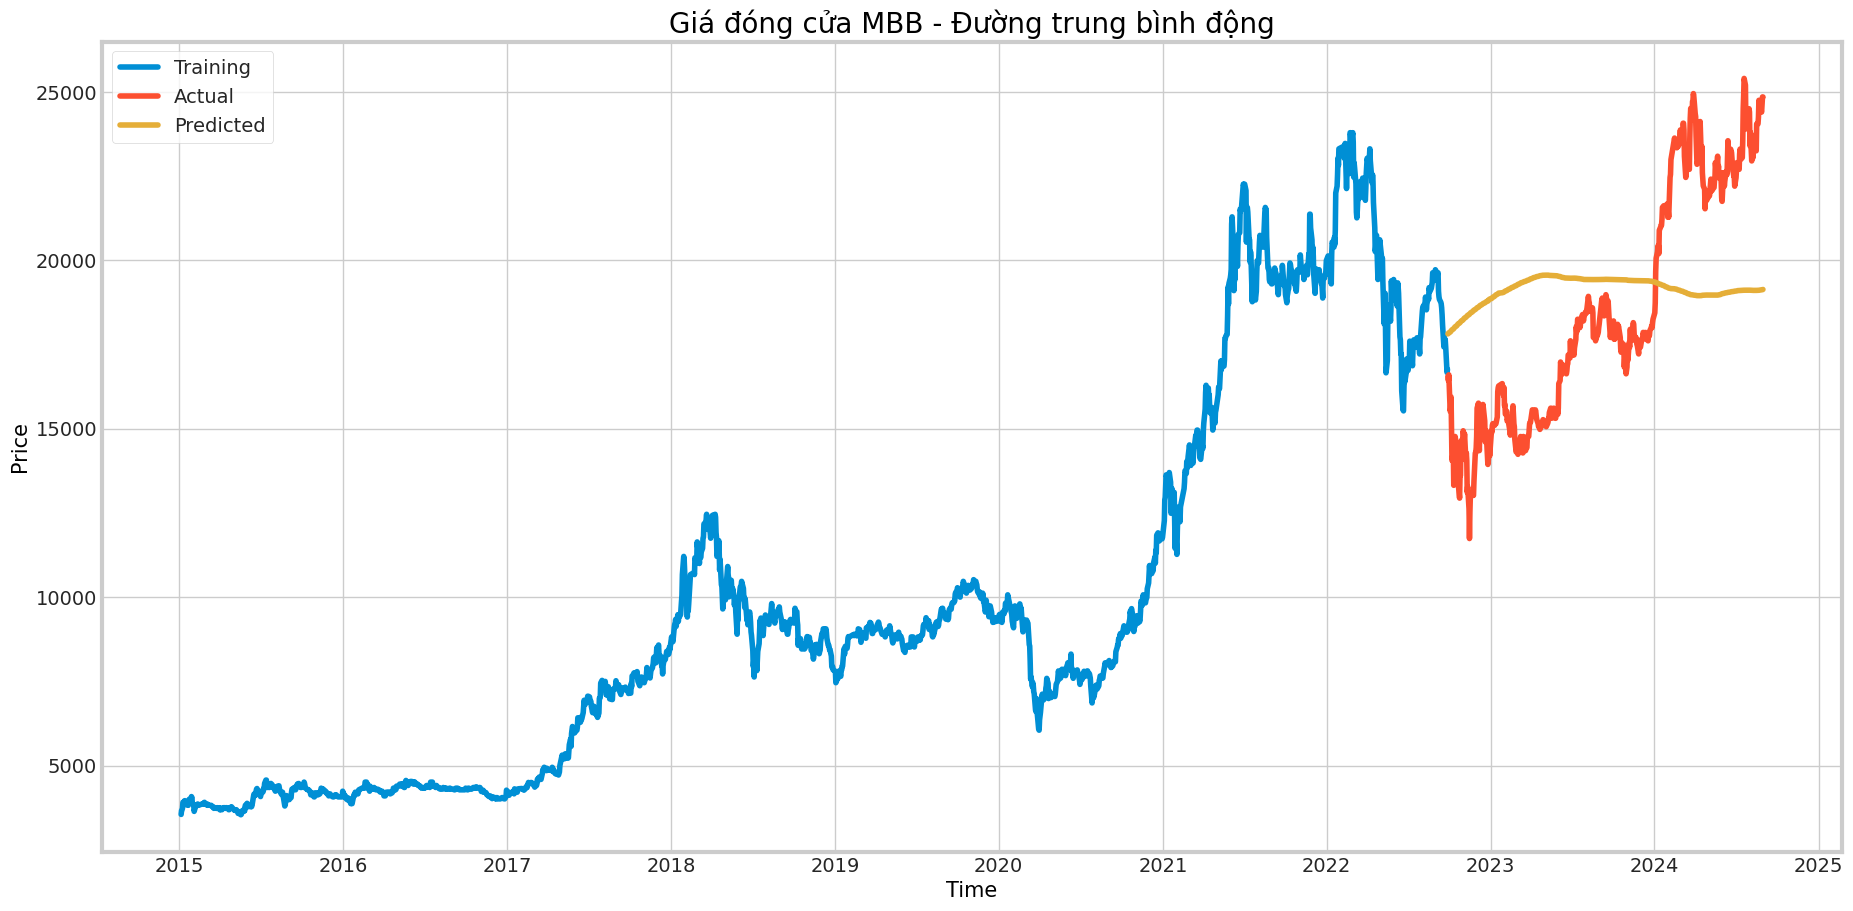

In [ ]:
# Plot thông số dự đoán và thực tế
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
test['Predictions'] = 0
test['Predictions'] = preds
plt.plot(train, label='Training')
plt.plot(test['close'], label='Actual')
plt.plot(test['Predictions'], label='Predicted')
plt.title("Giá đóng cửa MBB - Đường trung bình động", color = 'black', fontsize = 20)
plt.xlabel('Time', color = 'black', fontsize = 15)
plt.ylabel('Price', color = 'black', fontsize = 15)
plt.legend();

### Stock prediction with Linear Regression:

In [ ]:
# Import thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from vnstock import stock_historical_data
df = stock_historical_data('MBB', start_date='2015-01-01', end_date='2024-09-01')
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df.head()

open  high   low  close   volume ticker
time                                               
2015-01-05  3580  3580  3550   3550   338650    MBB
2015-01-06  3550  3690  3550   3670  2865710    MBB
2015-01-07  3690  3780  3670   3690  2235000    MBB
2015-01-08  3690  3780  3690   3730   853040    MBB
2015-01-09  3730  3940  3730   3910  6690100    MBB

In [ ]:
# df['MA_10'] = df['close'].rolling(window=10).mean()
# df['MA_20'] = df['close'].rolling(window=20).mean()
# df['MA_50'] = df['close'].rolling(window=50).mean()

# # Loại bỏ các giá trị NaN phát sinh từ việc tính MA
# df = df.dropna()

In [ ]:
split = int(0.8*len(df))
train, test = df[:split], df[split:]

In [ ]:
df.shape, train.shape, test.shape

((2413, 6), (1930, 6), (483, 6))

In [ ]:
X_train = train.drop(columns=['close', 'ticker'])
y_train = train['close']
X_test = test.drop(columns=['close', 'ticker'])
y_test = test['close']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1930, 4), (1930,), (483, 4), (483,))

In [ ]:
model = LinearRegression()

# Train model
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
preds = model.predict(X_test)
rmse = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
r2 = r2_score(y_test, preds)
print(rmse, r2)

141.25038534753816 0.9983778067914606


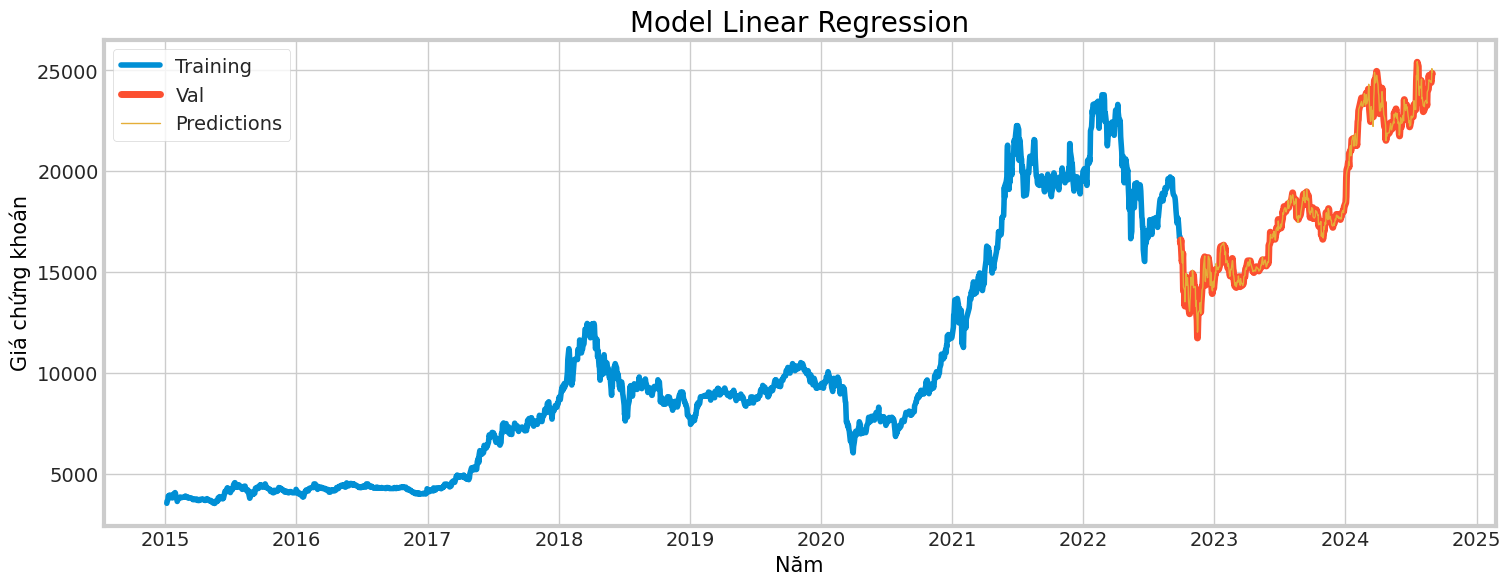

In [ ]:
# Plot thông số dự đoán và thực tế
plt.figure(figsize=(16,6))
sns.set_style("whitegrid")
test['Predictions'] = 0
test['Predictions'] = preds

test.index = df[split:].index
train.index = df[:split].index

plt.plot(train['close'], label='Training')
plt.plot(test['close'], label='Val', linewidth=5)
plt.plot(test['Predictions'], label='Predictions', linewidth=1)
plt.title("Model Linear Regression", color = 'black', fontsize = 20)
plt.xlabel('Năm', color = 'black', fontsize = 15)
plt.ylabel('Giá chứng khoán', color = 'black', fontsize = 15)
plt.legend();

### LSTM model:

In [ ]:
data_mbb = stock_historical_data(symbol='MBB', start_date='2015-01-01', end_date='2024-09-01')
data_mbb

time   open   high    low  close    volume ticker
0     2015-01-05   3580   3580   3550   3550    338650    MBB
1     2015-01-06   3550   3690   3550   3670   2865710    MBB
2     2015-01-07   3690   3780   3670   3690   2235000    MBB
3     2015-01-08   3690   3780   3690   3730    853040    MBB
4     2015-01-09   3730   3940   3730   3910   6690100    MBB
...          ...    ...    ...    ...    ...       ...    ...
2408  2024-08-26  24700  24800  24300  24450  10218000    MBB
2409  2024-08-27  24350  24500  24300  24400  10098000    MBB
2410  2024-08-28  24450  24700  24350  24650  12094000    MBB
2411  2024-08-29  24650  25200  24650  24850  22617900    MBB
2412  2024-08-30  24850  25000  24800  24850   8869300    MBB

[2413 rows x 7 columns]

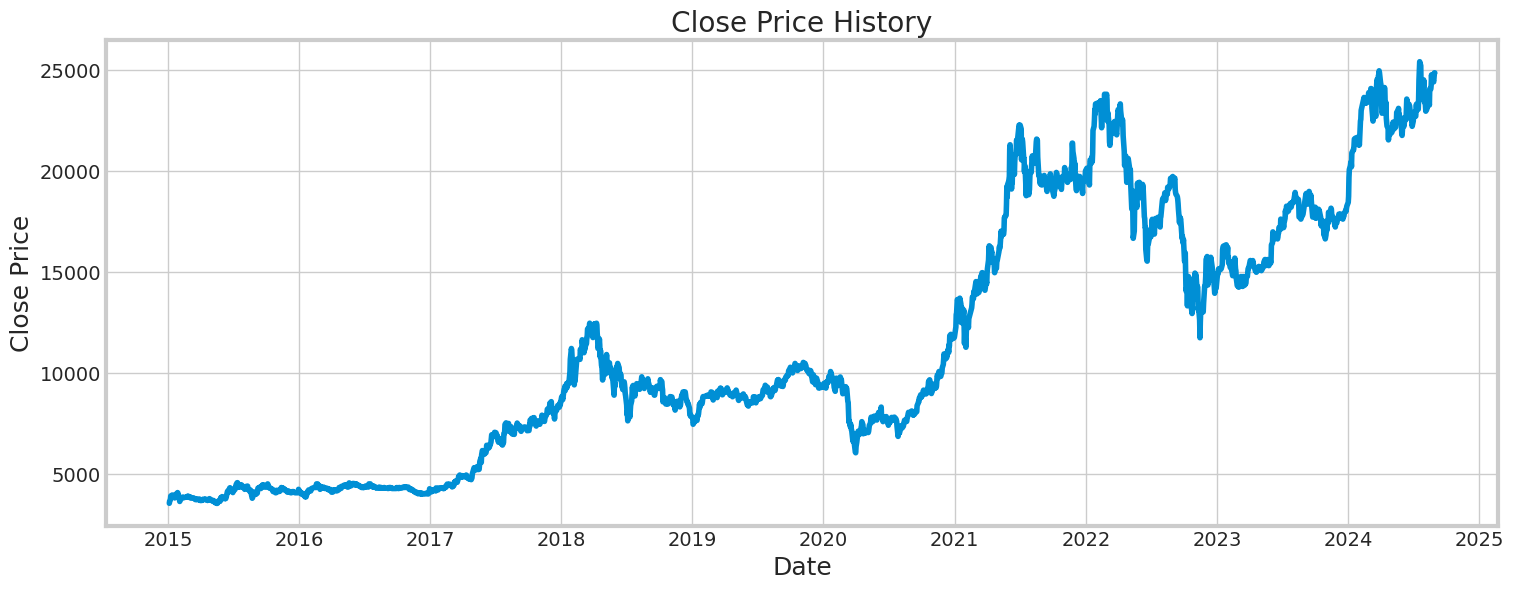

In [ ]:
data_mbb['time'] = pd.to_datetime(data_mbb['time'])
data_mbb.set_index('time', inplace=True)
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(data_mbb['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = data_mbb.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1931

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[4.57456542e-04],
       [5.94693504e-03],
       [6.86184812e-03],
       ...,
       [9.65690759e-01],
       [9.74839890e-01],
       [9.74839890e-01]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.00045746, 0.00594694, 0.00686185, 0.00869167, 0.01692589,
       0.01555352, 0.01921317, 0.01692589, 0.01692589, 0.0137237 ,
       0.0137237 , 0.01463861, 0.01280878, 0.01829826, 0.021043  ,
       0.021043  , 0.01692589, 0.02470265, 0.02333028, 0.01555352,
       0.0137237 , 0.00457457, 0.00686185, 0.00869167, 0.01097896,
       0.01280878, 0.0137237 , 0.01463861, 0.0137237 , 0.01280878,
       0.01555352, 0.01463861, 0.01692589, 0.01463861, 0.0137237 ,
       0.01463861, 0.01463861, 0.01280878, 0.0137237 , 0.01280878,
       0.01280878, 0.01280878, 0.01280878, 0.01280878, 0.01097896,
       0.01097896, 0.00960659, 0.00869167, 0.00960659, 0.00960659,
       0.00869167, 0.00869167, 0.00960659, 0.00960659, 0.00869167,
       0.00960659, 0.00686185, 0.00869167, 0.00686185, 0.00686185])]
[0.008691674290942364]

[array([0.00045746, 0.00594694, 0.00686185, 0.00869167, 0.01692589,
       0.01555352, 0.01921317, 0.01692589, 0.01692589, 0.0137237 ,
       0.0137237 , 0.01463861, 0.0

(1871, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=16, epochs=20)

Epoch 1/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - loss: 0.0129
Epoch 2/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - loss: 5.8512e-04
Epoch 3/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - loss: 6.1871e-04
Epoch 4/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 4.5837e-04
Epoch 5/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 5.2419e-04
Epoch 6/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - loss: 4.1587e-04
Epoch 7/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 3.7270e-04
Epoch 8/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - loss: 3.7924e-04
Epoch 9/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 3.2609e-04
Epoch 10/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - loss: 2.7586e-04
Epoch 11/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 3.0205e-04
Epoch 12/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - loss: 2.5581e-04
Epoch 13/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - loss: 3.4273e-04
Epoch 14/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


368.10179061957945

In [ ]:
r2 = r2_score(y_test, predictions)
r2

0.9889988899230957

In [ ]:
# Tính toán MAPE
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
accuracy = 100 - mape
print(f"MAPE: {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

MAPE: 1.48%
Accuracy: 98.52%


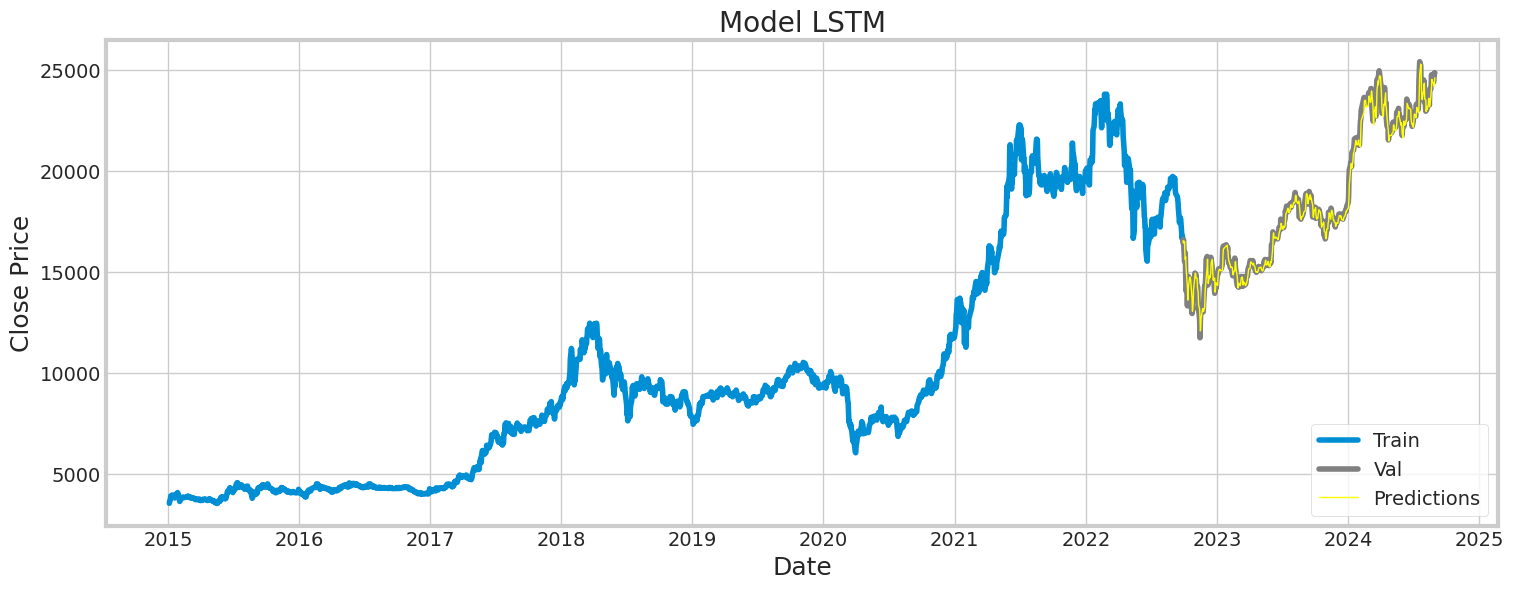

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Thêm cột 'time' từ data_mbb vào train và valid
# train['time'] = data_mbb.loc[:training_data_len - 1, 'time'].values
# valid['time'] = data_mbb.loc[training_data_len:, 'time'].values

# # Đảm bảo cột 'time' là datetime
# train['time'] = pd.to_datetime(train['time'])
# valid['time'] = pd.to_datetime(valid['time'])

# Vẽ biểu đồ với trục x là thời gian
plt.figure(figsize=(16, 6))
plt.title('Model LSTM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)

# Vẽ các tập dữ liệu
plt.plot(train['close'], label='Train')
plt.plot(valid['close'], label='Val', color='gray')
plt.plot(valid['Predictions'], label='Predictions', color='yellow', linewidth=1)

# Thêm chú thích
plt.legend(loc='lower right')

# Hiển thị biểu đồ
plt.show()


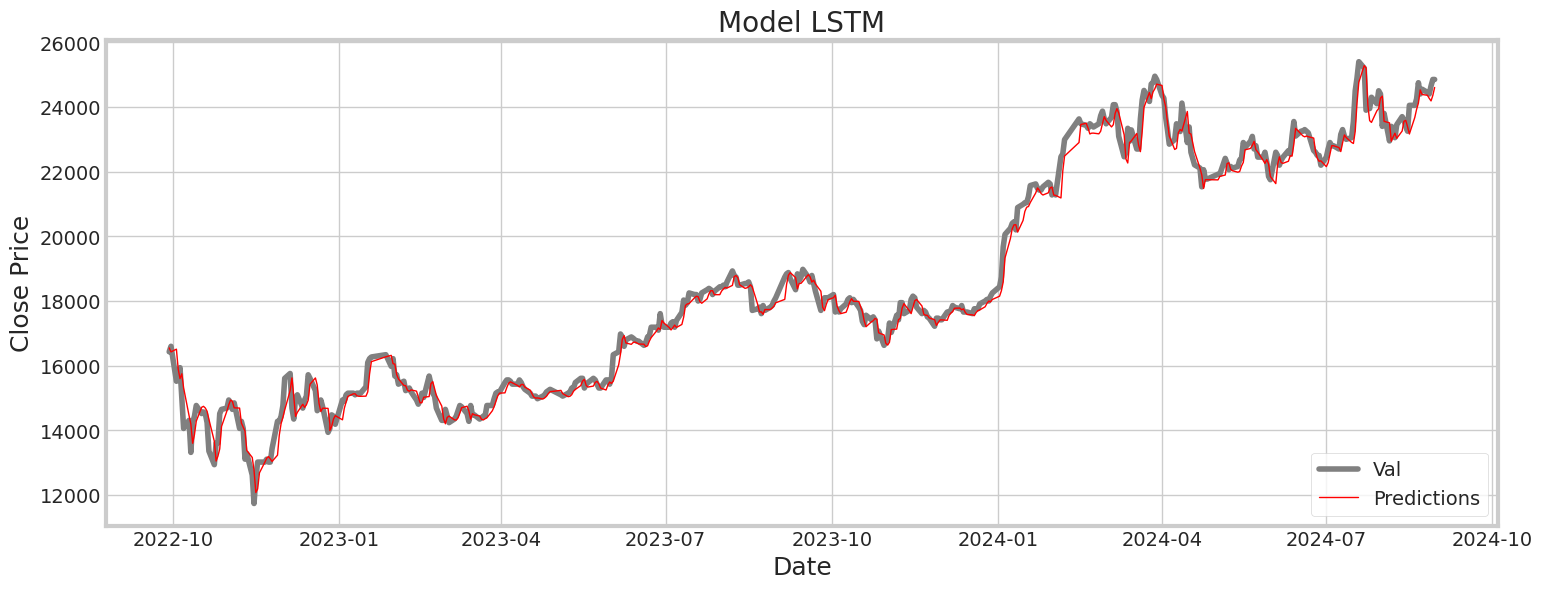

In [ ]:
plt.figure(figsize=(16, 6))
plt.title('Model LSTM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)

# Vẽ các tập dữ liệu
plt.plot(valid['close'], label='Val', color='gray')
plt.plot(valid['Predictions'], label='Predictions', color='red', linewidth=1)

# Thêm chú thích
plt.legend(loc='lower right')

# Hiển thị biểu đồ
plt.show()

In [ ]:
valid

close   Predictions
time                           
2022-09-29  16430  16549.693359
2022-09-30  16600  16427.025391
2022-10-03  15520  16511.755859
2022-10-04  15610  15890.456055
2022-10-05  15940  15601.265625
...           ...           ...
2024-08-26  24450  24361.248047
2024-08-27  24400  24266.896484
2024-08-28  24650  24186.140625
2024-08-29  24850  24357.736328
2024-08-30  24850  24602.443359

[482 rows x 2 columns]

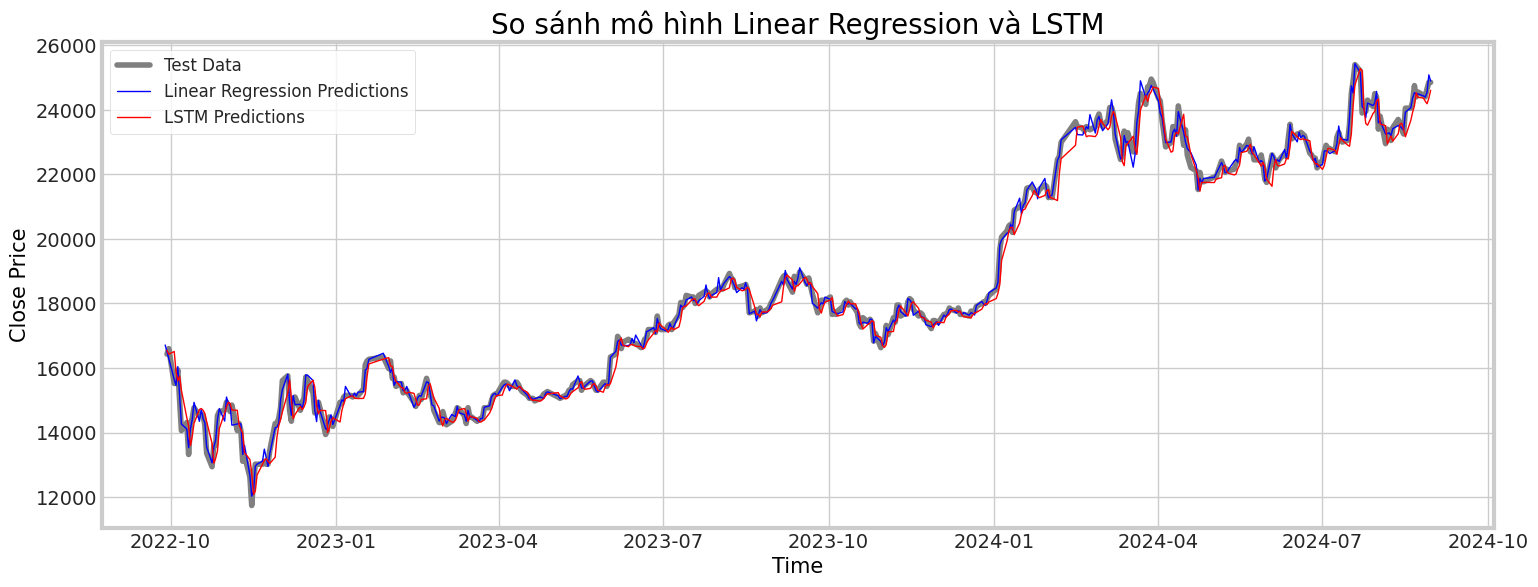

In [ ]:
# Combine data for visualization
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")

# Plot test data (actual close prices in test set)
plt.plot(valid['close'], label='Test Data', color='gray')

# Plot predictions from Linear Regression
plt.plot(test.index, test['Predictions'], label='Linear Regression Predictions', color='blue', linewidth=1)

# Plot predictions from LSTM
plt.plot(valid.index, valid['Predictions'], label='LSTM Predictions', color='red', linewidth=1)

# Add title, labels, and legend
plt.title("So sánh mô hình Linear Regression và LSTM", fontsize=20, color='black')
plt.xlabel('Time', fontsize=15, color='black')
plt.ylabel('Close Price', fontsize=15, color='black')
plt.legend(loc='best', fontsize=12)

# Show the plot
plt.show()


### Transformer:

#### Hàm tính các chỉ số:
* Bollinger Bands.
* Relative Strength Index (RSI).
* Rate of Change (ROC)

In [ ]:
import math
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add, GlobalAveragePooling1D

In [ ]:
def calculate_bollinger_bands(data, window=10, num_of_std=2):
    """Calculate Bollinger Bands"""
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_of_std)
    lower_band = rolling_mean - (rolling_std * num_of_std)
    return upper_band, lower_band

def calculate_rsi(data, window=10):
    """Calculate Relative Strength Index"""
    delta = data.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_roc(data, periods=10):
    """Calculate Rate of Change."""
    roc = ((data - data.shift(periods)) / data.shift(periods)) * 100
    return roc

#### Data Preparation:

In [ ]:
tickers = ['MBB', 'TCB', 'VPB', 'VCB']

In [ ]:
ticker_data_frames = []
stats = {}
for ticker in tickers:

    # Download historical data for the ticker
    data = stock_historical_data(ticker, '2023-01-01', '2024-09-01')

    # Calculate the daily percentage change
    close = data['close']
    upper, lower = calculate_bollinger_bands(close, window=14, num_of_std=2)
    width = upper - lower
    rsi = calculate_rsi(close, window=14)
    roc = calculate_roc(close, periods=14)
    volume = data['volume']
    diff = data['close'].diff(1)
    percent_change_close = data['close'].pct_change() * 100

    # Create a DataFrame for the current ticker and append it to the list
    ticker_df = pd.DataFrame({
        ticker+'_close': close,
        ticker+'_width': width,
        ticker+'_rsi': rsi,
        ticker+'_roc': roc,
        ticker+'_volume': volume,
        ticker+'_diff': diff,
        ticker+'_percent_change_close': percent_change_close,
    })

    MEAN = ticker_df.mean()
    STD = ticker_df.std()

    # Keep track of mean and std
    for column in MEAN.index:
      stats[f"{column}_mean"] = MEAN[column]
      stats[f"{column}_std"] = STD[column]

    # Normalize the training features
    ticker_df = (ticker_df - MEAN) / STD

    ticker_data_frames.append(ticker_df)

In [ ]:
# Convert the dictionary containing feature statistics to a DataFrame for easier access
stats = pd.DataFrame([stats], index=[0])

# Display the DataFrame to verify its structure
stats.head()

MBB_close_mean  MBB_close_std  MBB_width_mean  MBB_width_std  MBB_rsi_mean  \
0    19195.937198    3303.432395      1642.20031     885.090968     57.309006   

   MBB_rsi_std  MBB_roc_mean  MBB_roc_std  MBB_volume_mean  MBB_volume_std  \
0    17.637565      1.730083     5.270256     1.325419e+07    9.277459e+06   

   ...  VCB_rsi_mean  VCB_rsi_std  VCB_roc_mean  VCB_roc_std  VCB_volume_mean  \
0  ...     51.941227    15.878782      0.813812     4.053944     1.212431e+06   

   VCB_volume_std  VCB_diff_mean  VCB_diff_std  VCB_percent_change_close_mean  \
0   645718.472378      52.687651   1081.724976                       0.073746   

   VCB_percent_change_close_std  
0                      1.279707  

[1 rows x 56 columns]

In [ ]:
df = pd.concat(ticker_data_frames, axis=1)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.head()

MBB_close  MBB_width   MBB_rsi   MBB_roc  MBB_volume  MBB_diff  \
14  -0.973514   0.562131  1.105318  0.992569   -0.063584 -1.297018   
15  -0.901165   0.566077  1.333697  1.351408    0.184631  0.726221   
16  -1.064328   0.476860  0.249126  0.400545    0.268016 -1.901626   
17  -1.052220   0.387294  0.240328  0.385616   -0.112681  0.054059   
18  -1.140007   0.306568 -0.126597  0.022409   -0.348328 -1.060580   

    MBB_percent_change_close  TCB_close  TCB_width   TCB_rsi  ...  VPB_volume  \
14                 -1.596053  -0.965194  -0.448115  0.869329  ...    0.844577   
15                  0.929906  -0.873724  -0.388364  1.363260  ...    0.981783   
16                 -2.360970  -1.029760  -0.440205  0.042076  ...    1.745450   
17                  0.082741  -1.056663  -0.478418 -0.125589  ...    1.071717   
18                 -1.351298  -1.175035  -0.336591 -0.668341  ...    0.438247   

    VPB_diff  VPB_percent_change_close  VCB_close  VCB_width   VCB_rsi  \
14 -1.415487                 -1.455062  -1.625701   2.181362  1.118814   
15  0.595191                  0.615159  -1.341747   2.078910  1.288420   
16 -3.562483                 -3.697226  -1.739283   1.796029  0.608580   
17  0.288478                  0.310901  -1.527152   1.480305  0.763363   
18 -0.461267                 -0.511686  -1.186407   1.674464  0.715605   

     VCB_roc  VCB_volume  VCB_diff  VCB_percent_change_close  
14  1.978896   -0.259294 -2.480009                 -2.667352  
15  2.511923    0.364353  1.522857                  1.687550  
16  1.293929   -0.117746 -2.248897                 -2.447503  
17  1.734355   -0.352833  1.125344                  1.257874  
18  1.532472   -0.494071  1.837170                  2.020478  

[5 rows x 28 columns]

In [ ]:
# Shift the dataframe up by one to align current features with the next step's outcomes
labels = df.shift(-1)

# Remove the last row from both the features and labels to maintain consistent data pairs
df = df.iloc[:-1]
labels = labels.iloc[:-1]

In [ ]:
SEQUENCE_LEN = 24  # 2 hours of data at 5-minute intervals

def create_sequences(data, labels, mean, std, sequence_length=SEQUENCE_LEN):
    sequences = []
    lab = []
    data_size = len(data)

    # Loop to create each sequence and its corresponding label
    for i in range(data_size - (sequence_length + 13)): # Ensure we have data for the label
        if i == 0:
          continue
        sequences.append(data[i:i + sequence_length])  # The sequence of data
        lab.append([labels[i-1], labels[i + 12], mean[0], std[0]]) # The label and scaling factors

    return np.array(sequences), np.array(lab)

In [ ]:
sequences_dict = {}
sequence_labels = {}
for ticker in tickers:

    # Extract close and volume data for the ticker
    close = df[ticker+'_close'].values
    width = df[ticker+'_width'].values
    rsi = df[ticker+'_rsi'].values
    roc = df[ticker+'_roc'].values
    volume = df[ticker+'_volume'].values
    diff = df[ticker+'_diff'].values
    pct_change = df[ticker+'_percent_change_close'].values

    # Combine close and volume data
    ticker_data = np.column_stack((close,
                                   width,
                                   rsi,
                                   roc,
                                   volume,
                                   diff,
                                   pct_change))

    # Generate sequences
    attribute = ticker+"_close"
    ticker_sequences, lab = create_sequences(ticker_data,
                                             labels[attribute].values[SEQUENCE_LEN-1:],
                                             stats[attribute+"_mean"].values,
                                             stats[attribute+"_std"].values)

    sequences_dict[ticker] = ticker_sequences
    sequence_labels[ticker] = lab

In [ ]:
# Combine data and labels from all tickers
all_sequences = []
all_labels = []

for ticker in tickers:
    all_sequences.extend(sequences_dict[ticker])
    all_labels.extend(sequence_labels[ticker])

# Convert to numpy arrays
all_sequences = np.array(all_sequences)
all_labels = np.array(all_labels)

In [ ]:
np.random.seed(42)
shuffled_indices = np.random.permutation(len(all_sequences))
all_sequences = all_sequences[shuffled_indices]
all_labels = all_labels[shuffled_indices]

train_size = int(len(all_sequences) * 0.9)

# Split sequences
train_sequences = all_sequences[:train_size]
train_labels    = all_labels[:train_size]

other_sequences = all_sequences[train_size:]
other_labels    = all_labels[train_size:]

shuffled_indices = np.random.permutation(len(other_sequences))
other_sequences = other_sequences[shuffled_indices]
other_labels = other_labels[shuffled_indices]

val_size = int(len(other_sequences) * 0.5)

validation_sequences = other_sequences[:val_size]
validation_labels = other_labels[:val_size]

test_sequences = other_sequences[val_size:]
test_labels = other_labels[val_size:]

#### Build model:

In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Add()([x, inputs])

    # Feed Forward Part
    y = LayerNormalization(epsilon=1e-6)(x)
    y = Dense(ff_dim, activation="relu")(y)
    y = Dropout(dropout)(y)
    y = Dense(inputs.shape[-1])(y)
    return Add()([y, x])

In [ ]:
def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_layers, dropout=0):
    inputs = Input(shape=input_shape)
    x = inputs
    for _ in range(num_layers):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
    x = GlobalAveragePooling1D()(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    outputs = Dense(1, activation="linear")(x)
    return Model(inputs=inputs, outputs=outputs)

In [ ]:
input_shape = train_sequences.shape[1:]
head_size = 256
num_heads = 16
ff_dim = 1024
num_layers = 12
dropout = 0.20

model = build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_layers, dropout)
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 24, 7)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 24, 7)          │             14 │ input_layer_2[0][0]    │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 24, 7)          │        126,983 │ layer_normalization[0… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 24, 7)          │              0 │ multi_head_attention[… │
│                           │                        │                │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 24, 7)          │             14 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 24, 1024)       │          8,192 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 24, 1024)       │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 24, 7)          │          7,175 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 24, 7)          │              0 │ dense_4[0][0],         │
│                           │                        │                │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 24, 7)          │             14 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 24, 7)          │        126,983 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 24, 7)          │              0 │ multi_head_attention_… │
│                           │                        │                │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_3     │ (None, 24, 7)          │             14 │ add_2[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 24, 1024)       │          8,192 │ layer_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)  

 Total params: 1,708,558 (6.52 MB)

 Trainable params: 1,708,558 (6.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def custom_mae_loss(y_true, y_pred):
    y_true_next = tf.cast(y_true[:, 1], tf.float64)  # Extract the true next values, scaled
    y_pred_next = tf.cast(y_pred[:, 0], tf.float64)  # Extract the predicted next values, scaled
    abs_error = tf.abs(y_true_next - y_pred_next)  # Calculate the absolute error
    return tf.reduce_mean(abs_error)  # Return the mean of these errors

def dir_acc(y_true, y_pred):
    mean, std = tf.cast(y_true[:, 2], tf.float64), tf.cast(y_true[:, 3], tf.float64)  # Retrieve scaling factors
    y_true_prev = (tf.cast(y_true[:, 0], tf.float64) * std) + mean  # Un-scale previous true price
    y_true_next = (tf.cast(y_true[:, 1], tf.float64) * std) + mean  # Un-scale next true price
    y_pred_next = (tf.cast(y_pred[:, 0], tf.float64) * std) + mean  # Un-scale predicted next price

    true_change = y_true_next - y_true_prev  # Calculate true change
    pred_change = y_pred_next - y_true_prev  # Calculate predicted change

    correct_direction = tf.equal(tf.sign(true_change), tf.sign(pred_change))  # Check if the signs match
    return tf.reduce_mean(tf.cast(correct_direction, tf.float64))  # Return the mean of correct directions

In [ ]:
# Define a callback to save the best model
checkpoint_callback_train = ModelCheckpoint(
    "transformer_train_model.keras",  # Filepath to save the best model
    monitor="dir_acc",  #"loss",  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode="max",  # Minimize the monitored metric
    verbose=1,  # Display progress
)

# Define a callback to save the best model
checkpoint_callback_val = ModelCheckpoint(
    "transformer_val_model.keras",  # Filepath to save the best model
    monitor="val_dir_acc", #"val_loss",  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode="max",  # Minimize the monitored metric
    verbose=1,  # Display progress
)

def get_lr_callback(batch_size=16, mode='cos', epochs=500, plot=False):
    lr_start, lr_max, lr_min = 0.0001, 0.005, 0.00001  # Adjust learning rate boundaries
    lr_ramp_ep = int(0.30 * epochs)  # 30% of epochs for warm-up
    lr_sus_ep = max(0, int(0.10 * epochs) - lr_ramp_ep)  # Optional sustain phase, adjust as needed

    def lrfn(epoch):
        if epoch < lr_ramp_ep:  # Warm-up phase
            lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start
        elif epoch < lr_ramp_ep + lr_sus_ep:  # Sustain phase at max learning rate
            lr = lr_max
        elif mode == 'cos':
            decay_total_epochs, decay_epoch_index = epochs - lr_ramp_ep - lr_sus_ep, epoch - lr_ramp_ep - lr_sus_ep
            phase = math.pi * decay_epoch_index / decay_total_epochs
            lr = (lr_max - lr_min) * 0.5 * (1 + math.cos(phase)) + lr_min
        else:
            lr = lr_min  # Default to minimum learning rate if mode is not recognized

        return lr

    if plot:  # Plot learning rate curve if plot is True
        plt.figure(figsize=(10, 5))
        plt.plot(np.arange(epochs), [lrfn(epoch) for epoch in np.arange(epochs)], marker='o')
        plt.xlabel('Epoch')
        plt.ylabel('Learning Rate')
        plt.title('Learning Rate Scheduler')
        plt.show()

    return tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

In [ ]:
BATCH_SIZE = 64  # Number of training examples used to calculate each iteration's gradient
EPOCHS = 10  # Total number of times the entire dataset is passed through the network
model.compile(optimizer='adam', loss=custom_mae_loss, metrics=[dir_acc])

model.fit(
    train_sequences,  # Training features
    train_labels,  # Training labels
    validation_data=(validation_sequences, validation_labels),  # Validation data
    epochs=EPOCHS,  # Number of epochs to train for
    batch_size=BATCH_SIZE,  # Size of each batch
    shuffle=True,  # Shuffle training data before each epoch
    callbacks=[checkpoint_callback_train, checkpoint_callback_val, get_lr_callback(batch_size=BATCH_SIZE, epochs=EPOCHS)]  # Callbacks for saving models and adjusting learning rate
)


Epoch 1: LearningRateScheduler setting learning rate to 0.0001.
Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - dir_acc: 0.5886 - loss: 0.6173
Epoch 1: dir_acc improved from -inf to 0.61024, saving model to transformer_train_model.keras

Epoch 1: val_dir_acc improved from -inf to 0.75781, saving model to transformer_val_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 133s 4s/step - dir_acc: 0.5896 - loss: 0.6134 - val_dir_acc: 0.7578 - val_loss: 0.4406 - learning_rate: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0017333333333333333.
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - dir_acc: 0.6063 - loss: 0.5347
Epoch 2: dir_acc improved from 0.61024 to 0.63256, saving model to transformer_train_model.keras

Epoch 2: val_dir_acc did not improve from 0.75781
21/21 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - dir_acc: 0.6074 - loss: 0.5332 - val_dir_acc: 0.7109 - val_loss: 0.4837 - learning_rate: 0.0017

Epoch 3: LearningRateScheduler setting learning rate to 0.00336666666666

In [ ]:
model.load_weights("transformer_val_model.keras")  # Load the best model from the validation phase
accuracy = model.evaluate(test_sequences, test_labels)[1]  # Evaluate the model on the test data
print(accuracy)

from sklearn.metrics import r2_score

predictions = model.predict(test_sequences)  # Make predictions on the test dataset
r2 = r2_score(test_labels[:, 1], predictions[:, 0])  # Calculate R-squared value
print(f"R-squared: {r2}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 389ms/step - dir_acc: 0.7872 - loss: 0.2660
0.7696759104728699
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
R-squared: 0.6710628572313719
